<a href="https://colab.research.google.com/github/mihhwiNick/DA_project/blob/huy/DA06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Th·ª±c h√†nh c√°c gi·∫£i thu·∫≠t ph√¢n lo·∫°i c∆° b·∫£n

##Import th∆∞ vi·ªán

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, StandardScaler

##N·∫°p d·ªØ li·ªáu

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')
fec = pd.read_csv('/content/gdrive/MyDrive/Dataset_Of_DA/diabetes_prediction_dataset.csv')
mushroom_data = pd.read_csv('/content/gdrive/MyDrive/Dataset_Of_DA/mushrooms.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##2.1.4. X√¢y d·ª±ng c√¢y quy·∫øt ƒë·ªãnh v√† r·ª´ng c√¢y cho b·ªô d·ªØ li·ªáu B·ªánh Ti·ªÉu ƒê∆∞·ªùng

**X√¢y d·ª±ng C√¢y Quy·∫øt ƒê·ªãnh**

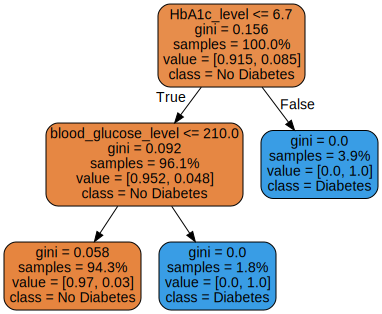

In [4]:
# Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
df_processed = fec.copy()

# M√£ h√≥a c√°c bi·∫øn categorical
label_encoders = {}
categorical_columns = ['gender', 'smoking_history']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

# ƒê·ªãnh nghƒ©a features v√† target
features_response = ['gender', 'age', 'hypertension', 'heart_disease',
                    'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = \
train_test_split(df_processed[features_response[:-1]].values,
                df_processed['diabetes'].values,
                test_size=0.2, random_state=24,
                stratify=df_processed['diabetes'])  # Gi·ªØ t·ª∑ l·ªá l·ªõp c√¢n b·∫±ng

# T·∫°o v√† hu·∫•n luy·ªán c√¢y quy·∫øt ƒë·ªãnh
dt = tree.DecisionTreeClassifier(max_depth=2, random_state=24)
dt.fit(X_train, y_train)

# Visualize the decision tree
dot_data = tree.export_graphviz(dt,
                               out_file=None,
                               filled=True,
                               rounded=True,
                               feature_names=features_response[:-1],
                               proportion=True,
                               class_names=['No Diabetes', 'Diabetes'])

graph = graphviz.Source(dot_data)
graph

**Nh·∫≠n x√©t:**
+ M√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh cho th·∫•y hai ch·ªâ s·ªë quan tr·ªçng nh·∫•t trong vi·ªác d·ª± ƒëo√°n b·ªánh ti·ªÉu ƒë∆∞·ªùng l√† HbA1c_level v√† blood_glucose_level. ƒêi·ªÅu ki·ªán ph√¢n chia ƒë·∫ßu ti√™n t·∫°i ng∆∞·ª°ng HbA1c_level ‚â§ 6.7 cho th·∫•y ƒë√¢y l√† y·∫øu t·ªë then ch·ªët trong ch·∫©n ƒëo√°n. Theo ti√™u chu·∫©n ch·∫©n ƒëo√°n c·ªßa Hi·ªáp h·ªôi ƒê√°i th√°o ƒë∆∞·ªùng Hoa K·ª≥ (ADA), ng∆∞·ª°ng HbA1c ‚â• 6.5% ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ch·∫©n ƒëo√°n b·ªánh ti·ªÉu ƒë∆∞·ªùng, trong khi gi√° tr·ªã t·ª´ 5.7% ƒë·∫øn 6.4% ƒë∆∞·ª£c xem l√† ti·ªÅn ti·ªÉu ƒë∆∞·ªùng.
+ ƒê·ªëi v·ªõi nh√≥m b·ªánh nh√¢n c√≥ HbA1c_level ‚â§ 6.7 (chi·∫øm 96.1% t·ªïng m·∫´u), nguy c∆° ti·ªÉu ƒë∆∞·ªùng l√† r·∫•t th·∫•p v·ªõi ch·ªâ 4.8% ƒë∆∞·ª£c ch·∫©n ƒëo√°n m·∫Øc b·ªánh. Trong khi ƒë√≥, nh√≥m c√≥ HbA1c_level > 6.7 (3.9% t·ªïng m·∫´u) ƒë∆∞·ª£c x√°c ƒë·ªãnh l√† nh√≥m nguy c∆° cao, v√† m√¥ h√¨nh ti·∫øp t·ª•c s·ª≠ d·ª•ng blood_glucose_level ‚â§ 210.0 ƒë·ªÉ tinh ch·ªânh ph√¢n lo·∫°i. ƒê√°ng ch√∫ √Ω, t·∫•t c·∫£ b·ªánh nh√¢n thu·ªôc nh√°nh n√†y ƒë·ªÅu ƒë∆∞·ª£c ch·∫©n ƒëo√°n ti·ªÉu ƒë∆∞·ªùng, th·ªÉ hi·ªán kh·∫£ nƒÉng d·ª± ƒëo√°n ch√≠nh x√°c tuy·ªát ƒë·ªëi cho c√°c tr∆∞·ªùng h·ª£p r√µ r√†ng.

**T√¨m tham s·ªë t·ªëi ∆∞u cho c√¢y quy·∫øt ƒë·ªãnh b·∫±ng GridSearchCV v√† v·∫Ω bi·ªÉu ƒë·ªì ƒë√°nh gi√° m√¥ h√¨nh v·ªõi c√°c tham s·ªë kh√°c nhau**

Fitting 4 folds for each of 7 candidates, totalling 28 fits


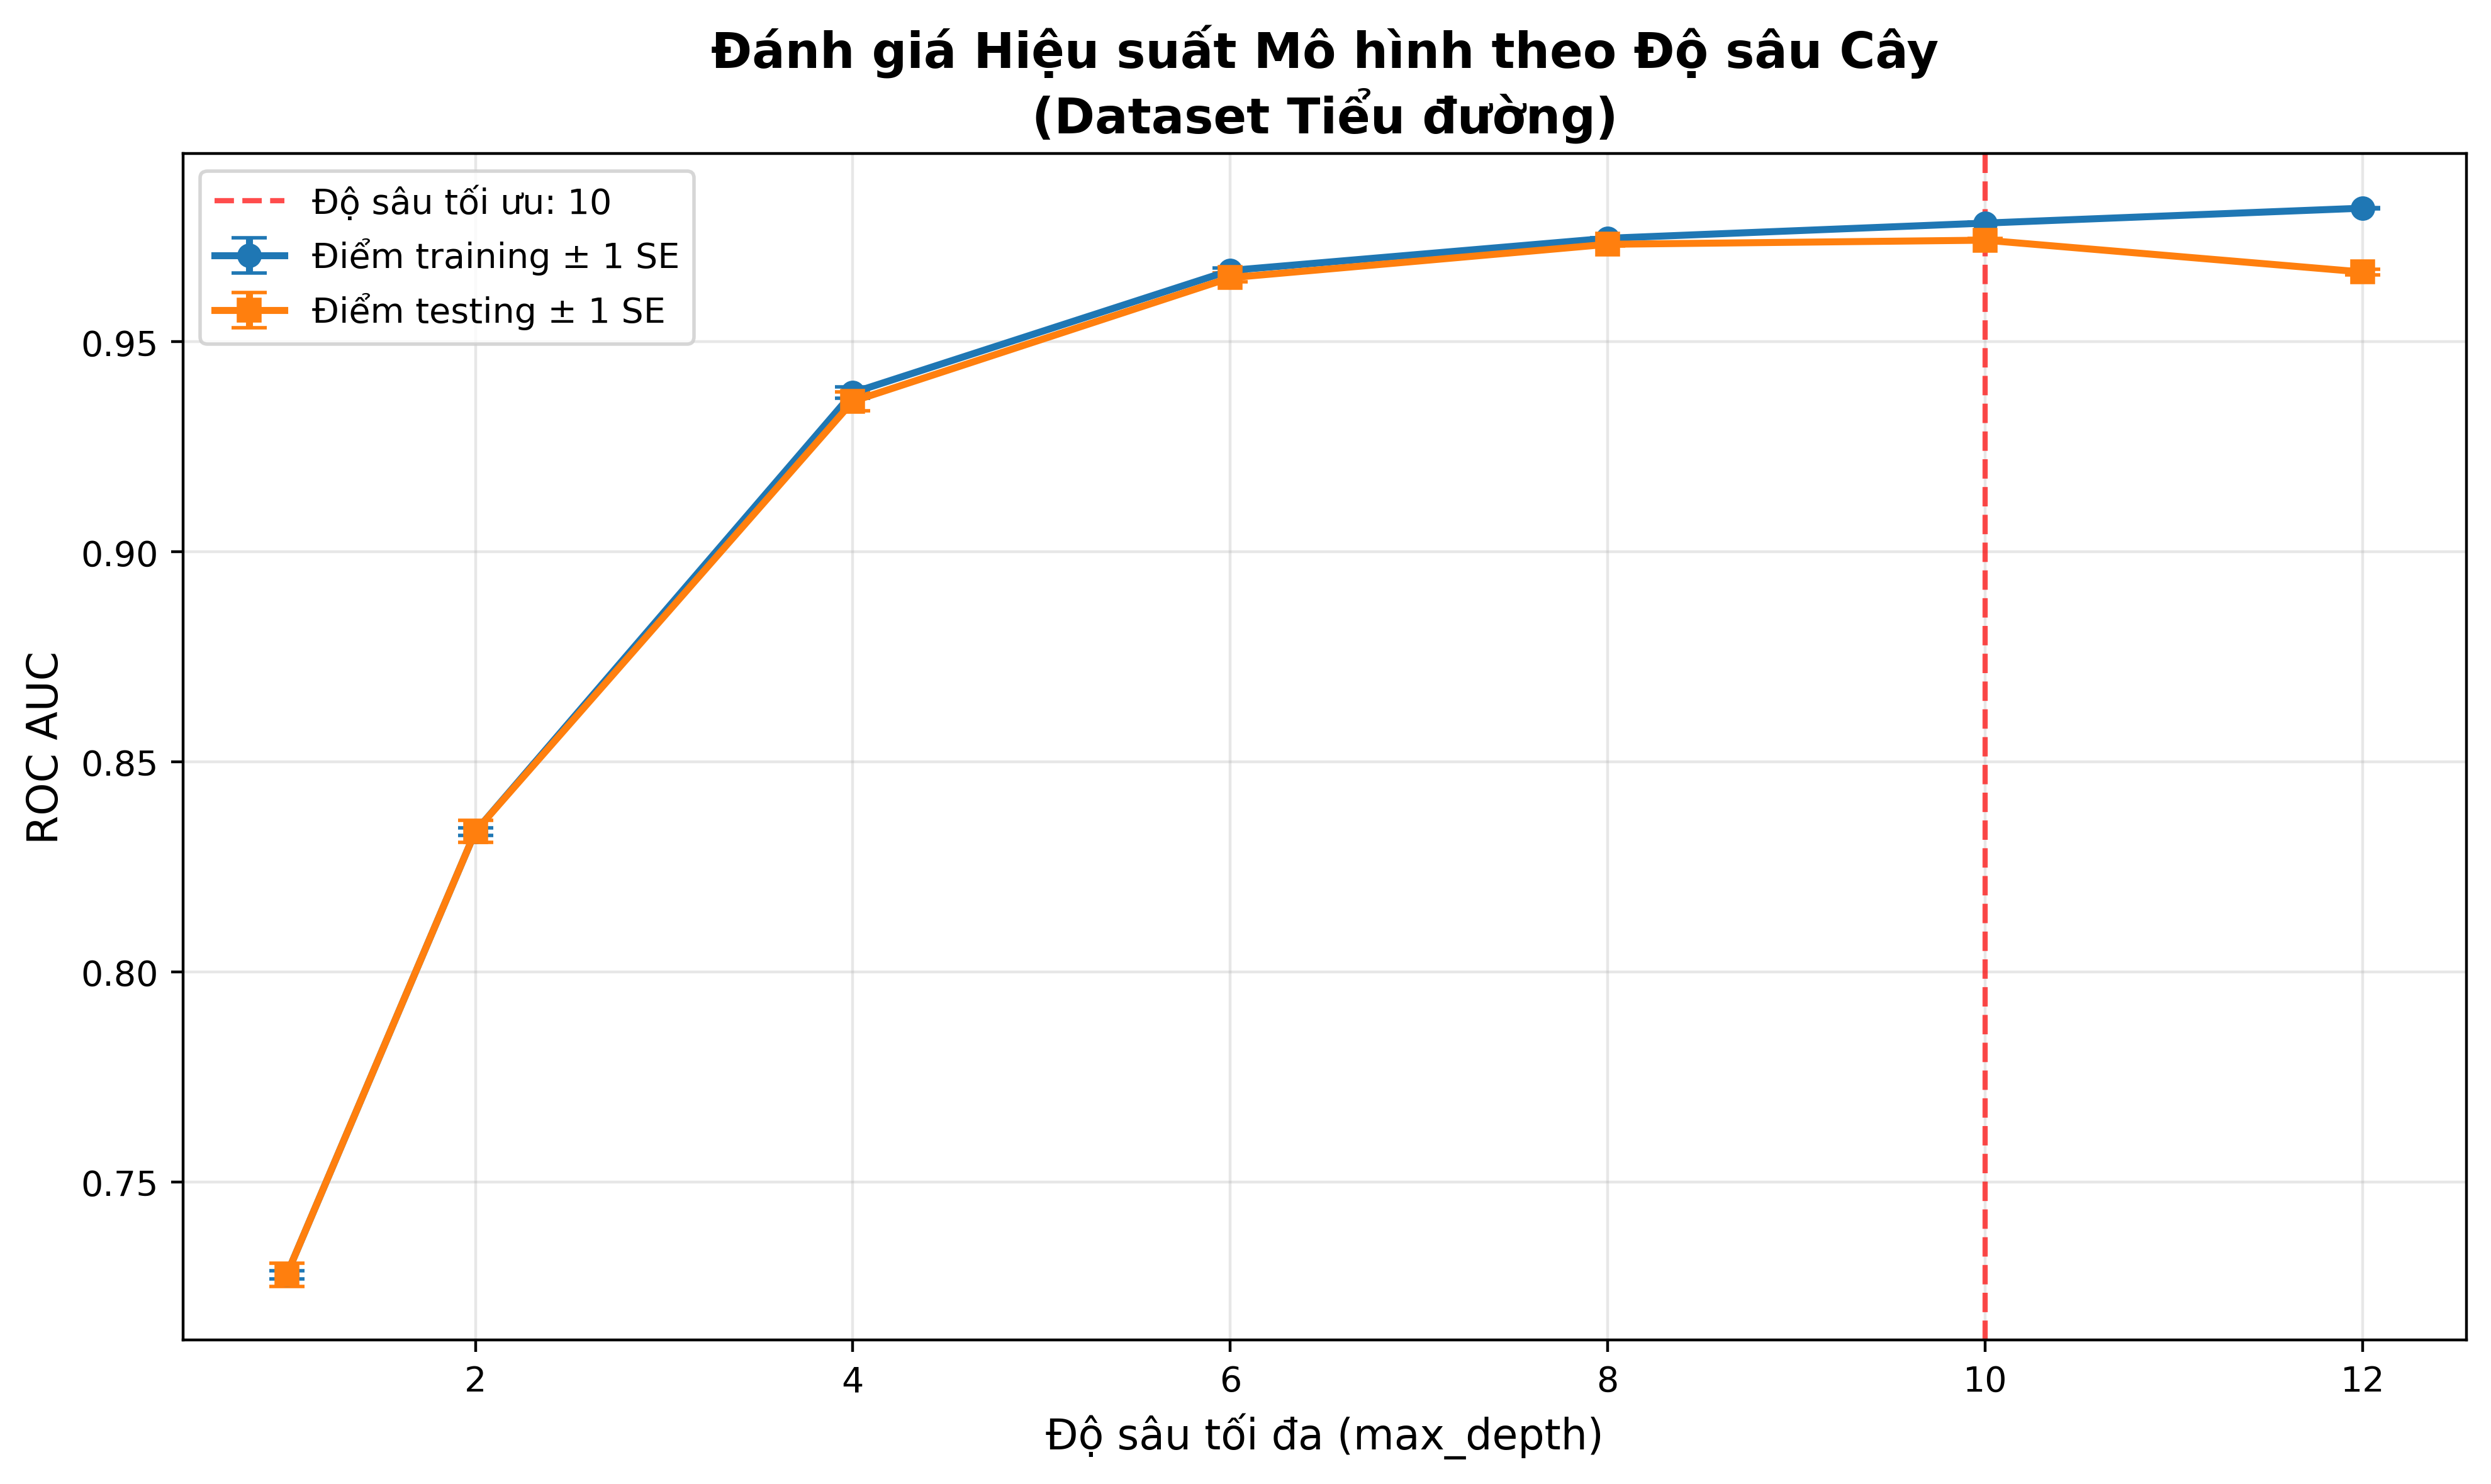

In [5]:
# ƒê·ªãnh nghƒ©a c√°c tham s·ªë c·∫ßn t·ªëi ∆∞u
params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}  # ƒê·ªô s√¢u c·ªßa c√¢y c·∫ßn th·ª≠

# T·∫°o m√¥ h√¨nh c√¢y quy·∫øt ƒë·ªãnh
dt = tree.DecisionTreeClassifier(random_state=24)  # Th√™m random_state ƒë·ªÉ k·∫øt qu·∫£ ·ªïn ƒë·ªãnh

# T·∫°o GridSearchCV ƒë·ªÉ t√¨m tham s·ªë t·ªëi ∆∞u
cv = GridSearchCV(dt,
                  param_grid=params,
                  scoring='roc_auc',  # S·ª≠ d·ª•ng ROC AUC ƒë·ªÉ ƒë√°nh gi√°
                  n_jobs=None,
                  refit=True,         # T·ª± ƒë·ªông hu·∫•n luy·ªán l·∫°i v·ªõi tham s·ªë t·ªët nh·∫•t
                  cv=4,               # 4-fold cross validation
                  verbose=1,          # Hi·ªÉn th·ªã ti·∫øn tr√¨nh
                  error_score=np.nan,
                  return_train_score=True)  # Tr·∫£ v·ªÅ ƒëi·ªÉm training ƒë·ªÉ so s√°nh

# Ch·∫°y GridSearchCV tr√™n d·ªØ li·ªáu ti·ªÉu ƒë∆∞·ªùng
cv.fit(X_train, y_train)

# Chuy·ªÉn k·∫øt qu·∫£ th√†nh DataFrame ƒë·ªÉ ph√¢n t√≠ch
cv_results_df = pd.DataFrame(cv.cv_results_)

results_display = cv_results_df[['param_max_depth', 'mean_train_score', 'mean_test_score', 'std_test_score']]

# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh hi·ªáu su·∫•t
plt.figure(figsize=(10, 6))
ax = plt.axes()

# V·∫Ω ƒë∆∞·ªùng training score v·ªõi v√πng sai s·ªë
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),  # Standard Error = std/sqrt(n_folds)
            label='ƒêi·ªÉm training ¬± 1 SE',
            marker='o',
            linewidth=2,
            capsize=5)

# V·∫Ω ƒë∆∞·ªùng testing score v·ªõi v√πng sai s·ªë
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),   # Standard Error = std/sqrt(n_folds)
            label='ƒêi·ªÉm testing ¬± 1 SE',
            marker='s',
            linewidth=2,
            capsize=5)

# T√πy ch·ªânh bi·ªÉu ƒë·ªì
ax.legend(fontsize=12)
plt.xlabel('ƒê·ªô s√¢u t·ªëi ƒëa (max_depth)', fontsize=12)
plt.ylabel('ROC AUC', fontsize=12)
plt.title('ƒê√°nh gi√° Hi·ªáu su·∫•t M√¥ h√¨nh theo ƒê·ªô s√¢u C√¢y\n(Dataset Ti·ªÉu ƒë∆∞·ªùng)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Highlight ƒëi·ªÉm t·ªët nh·∫•t
best_depth = cv.best_params_['max_depth']
best_score = cv.best_score_
plt.axvline(x=best_depth, color='red', linestyle='--', alpha=0.7, label=f'ƒê·ªô s√¢u t·ªëi ∆∞u: {best_depth}')

plt.legend()
plt.tight_layout()
plt.show()

# Hu·∫•n luy·ªán l·∫°i m√¥ h√¨nh v·ªõi tham s·ªë t·ªëi ∆∞u
best_dt = cv.best_estimator_

**Nh·∫≠n x√©t:** K·∫øt qu·∫£ t√¨m ki·∫øm tham s·ªë t·ªëi ∆∞u b·∫±ng GridSearchCV cho th·∫•y ƒë·ªô s√¢u t·ªëi ∆∞u c·ªßa c√¢y quy·∫øt ƒë·ªãnh l√† 10, ƒë·∫°t ƒëi·ªÉm ROC AUC kho·∫£ng 0.95 tr√™n t·∫≠p validation. ƒêi·ªÅu ƒë√°ng ch√∫ √Ω l√† hi·ªáu su·∫•t m√¥ h√¨nh ti·∫øp t·ª•c ƒë∆∞·ª£c c·∫£i thi·ªán khi tƒÉng ƒë·ªô s√¢u t·ª´ 1 l√™n 10, ch·ª©ng t·ªè d·ªØ li·ªáu ti·ªÉu ƒë∆∞·ªùng c√≥ c·∫•u tr√∫c kh√° ph·ª©c t·∫°p ƒë√≤i h·ªèi m√¥ h√¨nh ƒë·ªß s√¢u ƒë·ªÉ n·∫Øm b·∫Øt c√°c m·∫´u quan tr·ªçng. Tuy nhi√™n, kho·∫£ng c√°ch gi·ªØa ƒëi·ªÉm training v√† testing ·ªü ƒë·ªô s√¢u 10 cho th·∫•y c√≥ d·∫•u hi·ªáu overfitting, khi m√¥ h√¨nh h·ªçc qu√° kh·ªõp v·ªõi d·ªØ li·ªáu hu·∫•n luy·ªán. S·ª± ·ªïn ƒë·ªãnh c·ªßa ƒë∆∞·ªùng testing score t·ª´ ƒë·ªô s√¢u 6 ƒë·∫øn 12 cho th·∫•y m√¥ h√¨nh ƒë√£ ƒë·∫°t ƒë·∫øn ng∆∞·ª°ng hi·ªáu su·∫•t g·∫ßn t·ªëi ƒëa c√≥ th·ªÉ ƒë·∫°t ƒë∆∞·ª£c v·ªõi ki·∫øn tr√∫c c√¢y quy·∫øt ƒë·ªãnh n√†y. K·∫øt qu·∫£ ROC AUC ƒë·∫°t 0.95 l√† r·∫•t ·∫•n t∆∞·ª£ng, th·ªÉ hi·ªán kh·∫£ nƒÉng ph√¢n lo·∫°i xu·∫•t s·∫Øc gi·ªØa b·ªánh nh√¢n ti·ªÉu ƒë∆∞·ªùng v√† kh√¥ng ti·ªÉu ƒë∆∞·ªùng, ph√π h·ª£p cho ·ª©ng d·ª•ng th·ª±c t·∫ø trong s√†ng l·ªçc v√† ch·∫©n ƒëo√°n.

**X√¢y d·ª±ng R·ª´ng C√¢y**

Fitting 4 folds for each of 10 candidates, totalling 40 fits


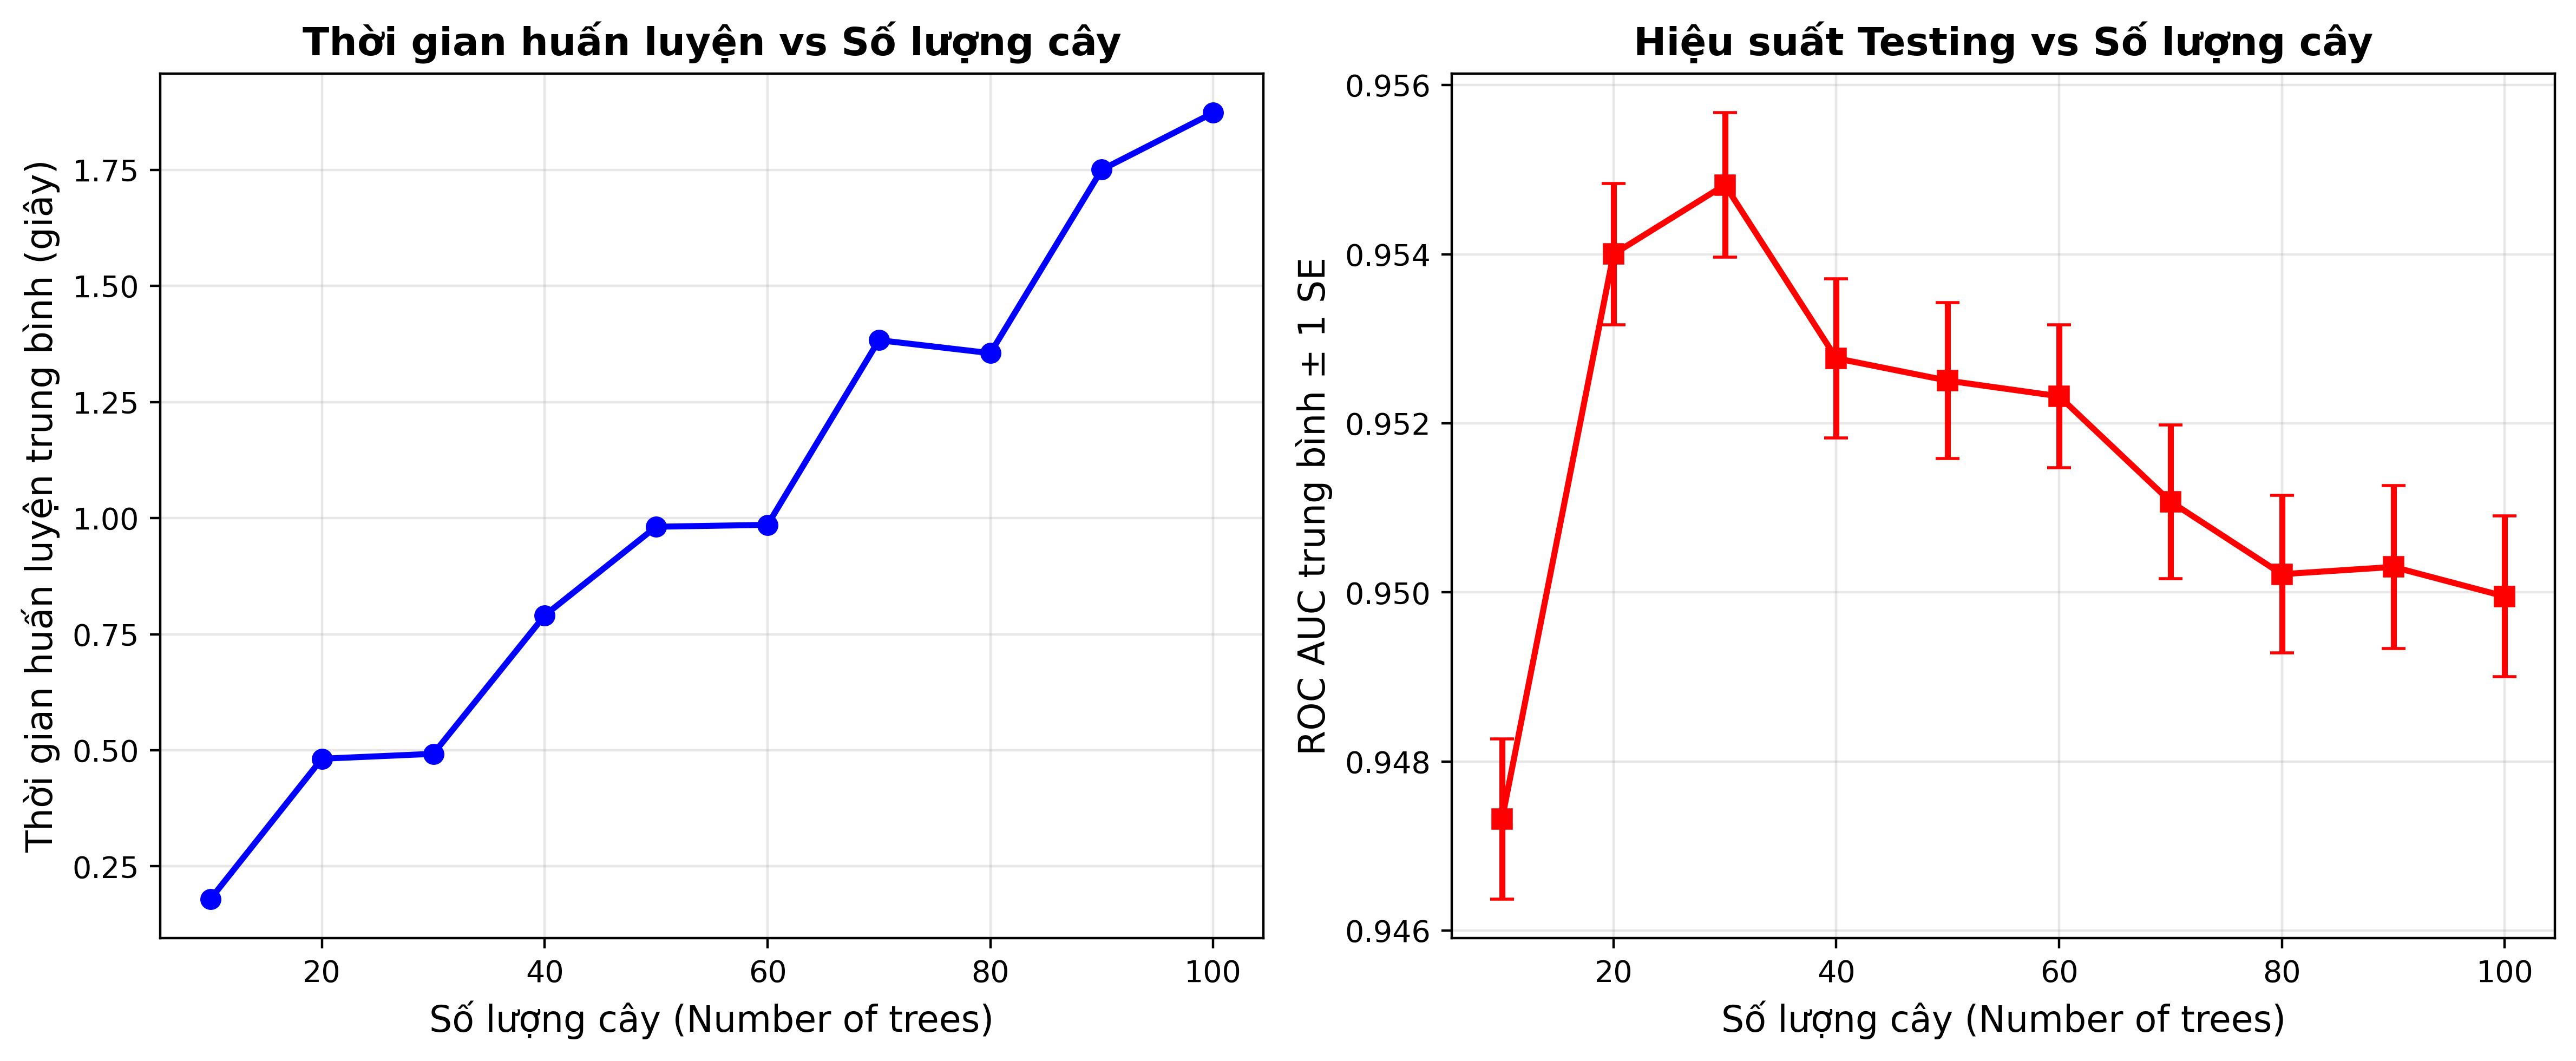

<Figure size 4000x2400 with 0 Axes>

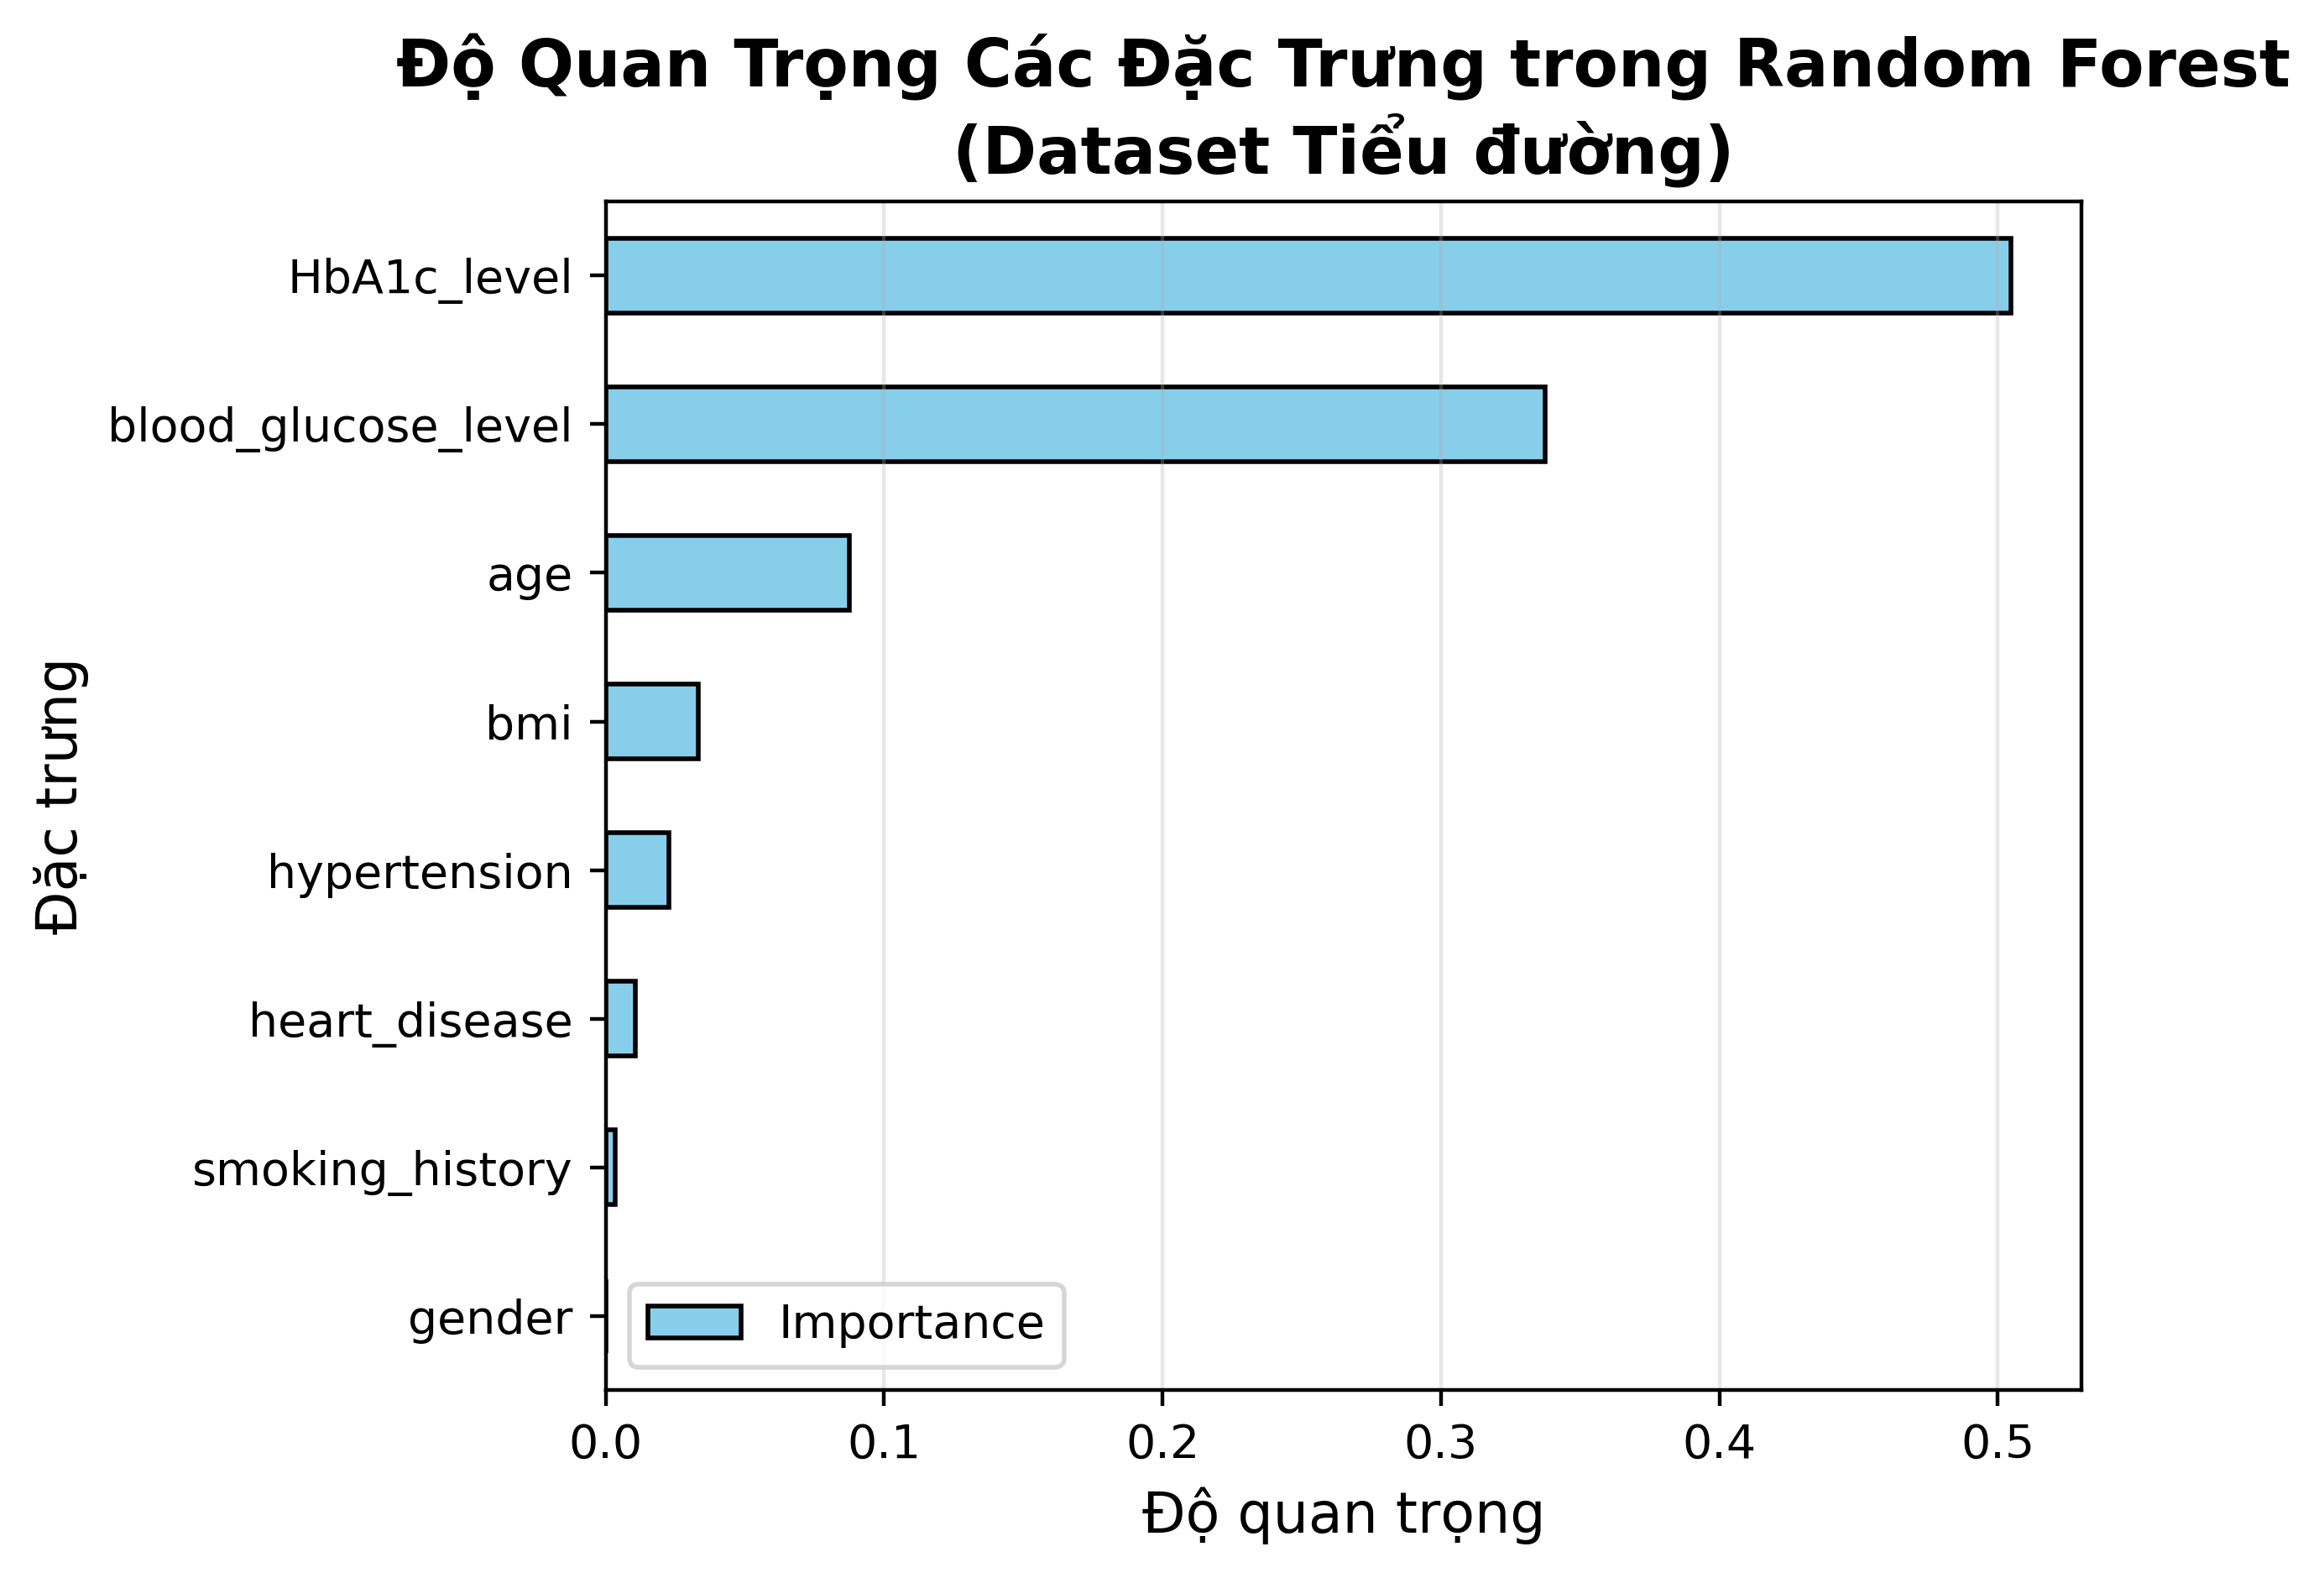

In [6]:
# T·∫°o m√¥ h√¨nh Random Forest
rf = RandomForestClassifier(
    n_estimators=10,
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=4,
    verbose=0,
    warm_start=False,
    class_weight=None
)

# T·∫°o l∆∞·ªõi tham s·ªë ƒë·ªÉ t√¨m s·ªë c√¢y t·ªëi ∆∞u (t·ª´ 10 ƒë·∫øn 100, b∆∞·ªõc nh·∫£y 10)
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

# T·∫°o GridSearchCV cho Random Forest
cv_rf_ex = GridSearchCV(rf,
                       param_grid=rf_params_ex,
                       scoring='roc_auc',
                       n_jobs=None,
                       refit=True,
                       cv=4,
                       verbose=1,
                       error_score=np.nan,
                       return_train_score=True)

# Hu·∫•n luy·ªán m√¥ h√¨nh tr√™n d·ªØ li·ªáu ti·ªÉu ƒë∆∞·ªùng
cv_rf_ex.fit(X_train, y_train)

# Chuy·ªÉn k·∫øt qu·∫£ th√†nh DataFrame
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

# V·∫Ω bi·ªÉu ƒë·ªì so s√°nh th·ªùi gian hu·∫•n luy·ªán v√† hi·ªáu su·∫•t
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bi·ªÉu ƒë·ªì 1: Th·ªùi gian hu·∫•n luy·ªán
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
           cv_rf_ex_results_df['mean_fit_time'],
           '-o', color='blue', linewidth=2, markersize=6)
axs[0].set_xlabel('S·ªë l∆∞·ª£ng c√¢y (Number of trees)', fontsize=12)
axs[0].set_ylabel('Th·ªùi gian hu·∫•n luy·ªán trung b√¨nh (gi√¢y)', fontsize=12)
axs[0].set_title('Th·ªùi gian hu·∫•n luy·ªán vs S·ªë l∆∞·ª£ng c√¢y', fontsize=13, fontweight='bold')
axs[0].grid(True, alpha=0.3)

# Bi·ªÉu ƒë·ªì 2: Hi·ªáu su·∫•t ROC AUC
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
               cv_rf_ex_results_df['mean_test_score'],
               yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4),
               color='red', linewidth=2, marker='s', markersize=6, capsize=4)
axs[1].set_xlabel('S·ªë l∆∞·ª£ng c√¢y (Number of trees)', fontsize=12)
axs[1].set_ylabel('ROC AUC trung b√¨nh ¬± 1 SE', fontsize=12)
axs[1].set_title('Hi·ªáu su·∫•t Testing vs S·ªë l∆∞·ª£ng c√¢y', fontsize=13, fontweight='bold')
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Hi·ªÉn th·ªã tham s·ªë t·ªët nh·∫•t

# Ph√¢n t√≠ch ƒë·ªô quan tr·ªçng c·ªßa c√°c feature
feat_imp_df = pd.DataFrame({
    'Importance': cv_rf_ex.best_estimator_.feature_importances_
}, index=features_response[:-1])

# S·∫Øp x·∫øp v√† v·∫Ω bi·ªÉu ƒë·ªì ƒë·ªô quan tr·ªçng feature
plt.figure(figsize=(10, 6))
feat_imp_df.sort_values('Importance', ascending=True).plot.barh(
    color='skyblue', edgecolor='black'
)
plt.title('ƒê·ªô Quan Tr·ªçng C√°c ƒê·∫∑c Tr∆∞ng trong Random Forest\n(Dataset Ti·ªÉu ƒë∆∞·ªùng)',
          fontsize=14, fontweight='bold')
plt.xlabel('ƒê·ªô quan tr·ªçng', fontsize=12)
plt.ylabel('ƒê·∫∑c tr∆∞ng', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Hi·ªÉn th·ªã b·∫£ng ƒë·ªô quan tr·ªçng chi ti·∫øt
feat_imp_sorted = feat_imp_df.sort_values('Importance', ascending=False)

# ƒê√°nh gi√° m√¥ h√¨nh t·ªët nh·∫•t tr√™n t·∫≠p test
best_rf = cv_rf_ex.best_estimator_
y_pred_proba_rf = best_rf.predict_proba(X_test)[:, 1]
test_roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

**NH·∫¨N X√âT BI·ªÇU ƒê·ªí TH·ªúI GIAN HU·∫§N LUY·ªÜN:** Bi·ªÉu ƒë·ªì th·ªùi gian hu·∫•n luy·ªán cho th·∫•y m·ªëi quan h·ªá tuy·∫øn t√≠nh gi·ªØa s·ªë l∆∞·ª£ng c√¢y v√† th·ªùi gian hu·∫•n luy·ªán - c√†ng nhi·ªÅu c√¢y th√¨ th·ªùi gian hu·∫•n luy·ªán c√†ng tƒÉng. ƒê√¢y l√† k·∫øt qu·∫£ ho√†n to√†n d·ª± ƒëo√°n ƒë∆∞·ª£c do m·ªói c√¢y b·ªï sung ƒë·ªÅu y√™u c·∫ßu th√™m t√†i nguy√™n t√≠nh to√°n. Tuy nhi√™n, t·ªëc ƒë·ªô tƒÉng th·ªùi gian l√† ch·∫•p nh·∫≠n ƒë∆∞·ª£c, cho ph√©p s·ª≠ d·ª•ng s·ªë l∆∞·ª£ng c√¢y l·ªõn m√† kh√¥ng l√†m ·∫£nh h∆∞·ªüng qu√° nhi·ªÅu ƒë·∫øn hi·ªáu su·∫•t t√≠nh to√°n t·ªïng th·ªÉ c·ªßa m√¥ h√¨nh.

**NH·∫¨N X√âT BI·ªÇU ƒê·ªí HI·ªÜU SU·∫§T ROC AUC:** Bi·ªÉu ƒë·ªì hi·ªáu su·∫•t ROC AUC cho th·∫•y m√¥ h√¨nh Random Forest ƒë·∫°t k·∫øt qu·∫£ r·∫•t ·∫•n t∆∞·ª£ng v·ªõi ROC AUC kho·∫£ng 0.955, th·ªÉ hi·ªán kh·∫£ nƒÉng ph√¢n lo·∫°i xu·∫•t s·∫Øc. ƒêi·ªÅu ƒë√°ng ch√∫ √Ω l√† hi·ªáu su·∫•t m√¥ h√¨nh kh√° ·ªïn ƒë·ªãnh across different numbers of trees, v·ªõi bi·∫øn ƒë·ªông r·∫•t nh·ªè khi s·ªë c√¢y thay ƒë·ªïi t·ª´ 10 ƒë·∫øn 100. ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh ƒë√£ ƒë·∫°t ƒë·∫øn ng∆∞·ª°ng hi·ªáu su·∫•t g·∫ßn t·ªëi ƒëa ngay c·∫£ v·ªõi s·ªë c√¢y khi√™m t·ªën, v√† vi·ªác tƒÉng th√™m s·ªë c√¢y kh√¥ng mang l·∫°i c·∫£i thi·ªán ƒë√°ng k·ªÉ v·ªÅ ƒë·ªô ch√≠nh x√°c nh∆∞ng l·∫°i l√†m tƒÉng th·ªùi gian hu·∫•n luy·ªán.

**NH·∫¨N X√âT BI·ªÇU ƒê·ªí ƒê·ªò QUAN TR·ªåNG ƒê·∫∂C TR∆ØNG:** Bi·ªÉu ƒë·ªì ƒë·ªô quan tr·ªçng c√°c ƒë·∫∑c tr∆∞ng cho th·∫•y HbA1c_level v√† blood_glucose_level l√† hai y·∫øu t·ªë quan tr·ªçng nh·∫•t trong vi·ªác d·ª± ƒëo√°n b·ªánh ti·ªÉu ƒë∆∞·ªùng, chi·∫øm t·ª∑ tr·ªçng l·ªõn trong m√¥ h√¨nh. ƒêi·ªÅu n√†y ho√†n to√†n ph√π h·ª£p v·ªõi ki·∫øn th·ª©c y khoa khi ƒë√¢y l√† hai ch·ªâ s·ªë tr·ª±c ti·∫øp ph·∫£n √°nh t√¨nh tr·∫°ng ƒë∆∞·ªùng huy·∫øt c·ªßa b·ªánh nh√¢n. Tu·ªïi (age) c≈©ng th·ªÉ hi·ªán vai tr√≤ ƒë√°ng k·ªÉ, ph·∫£n √°nh th·ª±c t·∫ø nguy c∆° ti·ªÉu ƒë∆∞·ªùng tƒÉng theo ƒë·ªô tu·ªïi. C√°c y·∫øu t·ªë nh∆∞ BMI, hypertension c√≥ m·ª©c ƒë·ªô quan tr·ªçng trung b√¨nh, trong khi heart_disease, smoking_history v√† gender c√≥ ƒë√≥ng g√≥p √≠t h∆°n trong m√¥ h√¨nh d·ª± ƒëo√°n n√†y.

##2.2.3. X√¢y d·ª±ng m√¥ h√¨nh t·ª´ gi·∫£i thu·∫≠t SVM tr√™n d·ªØ li·ªáu b·ªánh ti·ªÉu ƒë∆∞·ªùng.

üéØ B√ÄI TO√ÅN SVM D·ª∞ ƒêO√ÅN B·ªÜNH TI·ªÇU ƒê∆Ø·ªúNG
‚úÖ Training: (80000, 8), Testing: (20000, 8)

2. SO S√ÅNH C√ÅC KERNEL SVM...
   linear   | Train: 0.9610 | Test: 0.9607
   poly     | Train: 0.9644 | Test: 0.9647
   rbf      | Train: 0.9642 | Test: 0.9639
   sigmoid  | Train: 0.9167 | Test: 0.9160
‚≠ê KERNEL T·ªêT NH·∫§T: poly

3. PH√ÇN T√çCH D·ªÆ LI·ªÜU...


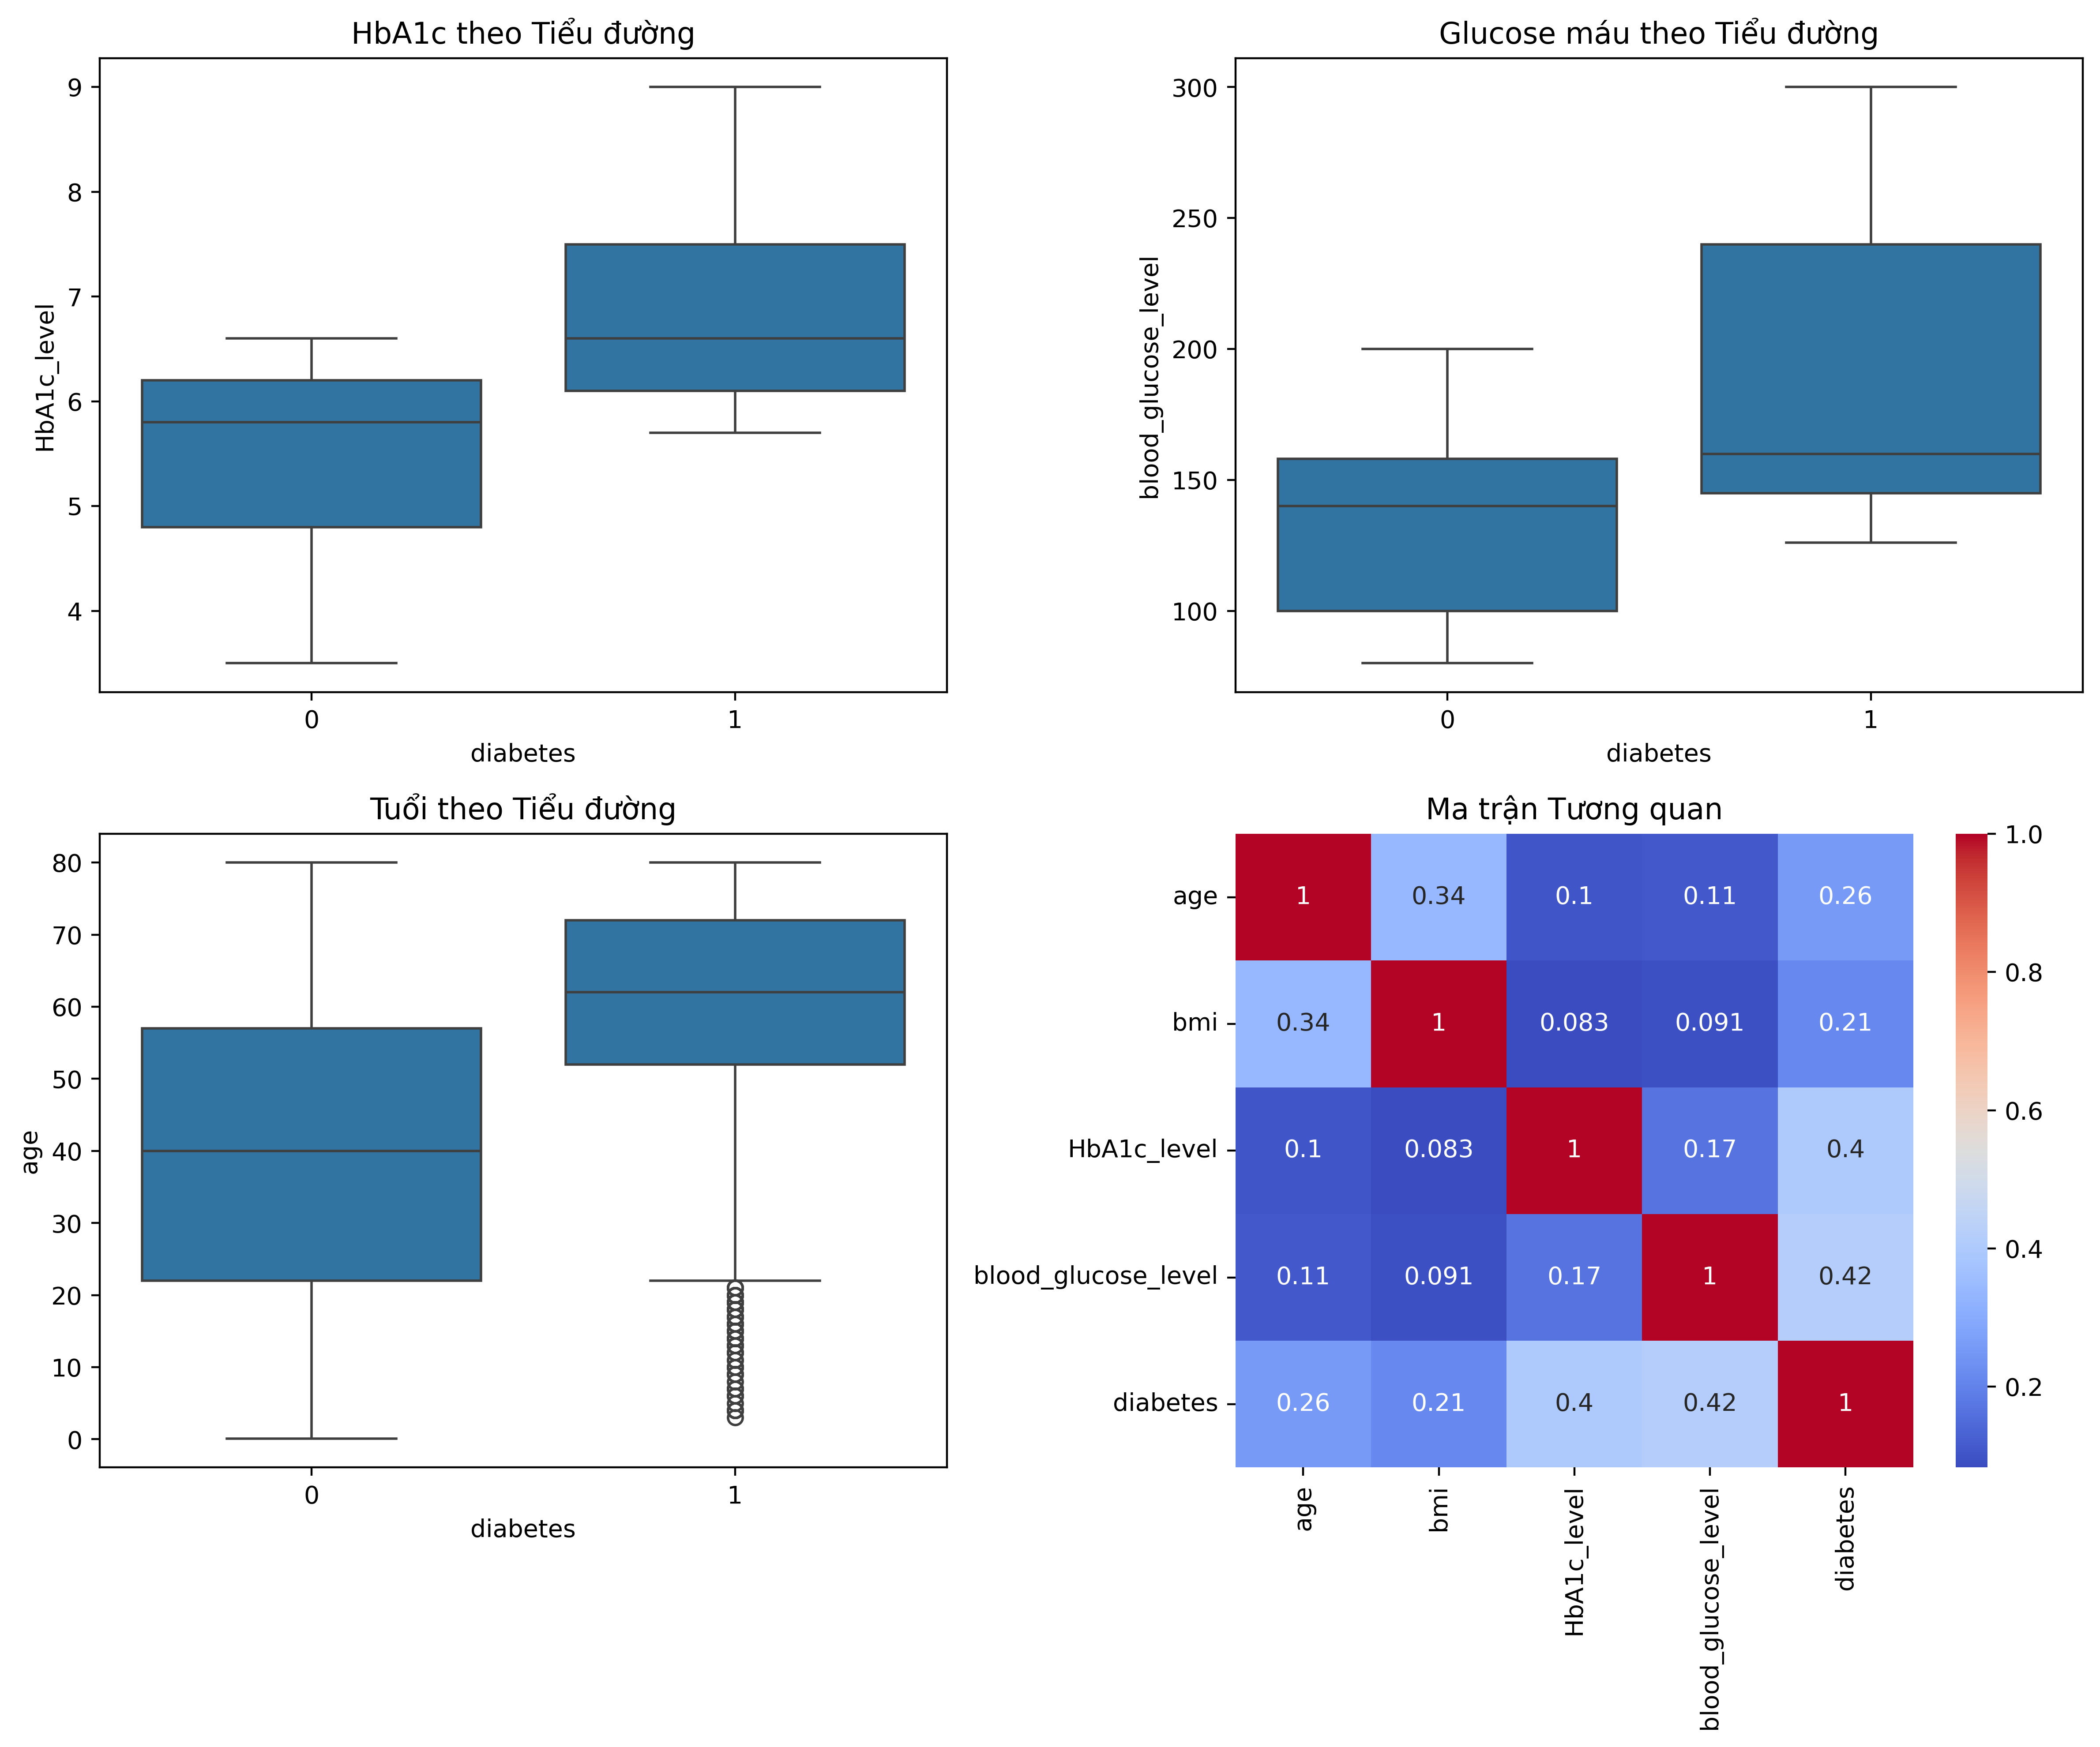


4. ƒê√ÅNH GI√Å M√î H√åNH T·ªêT NH·∫§T...


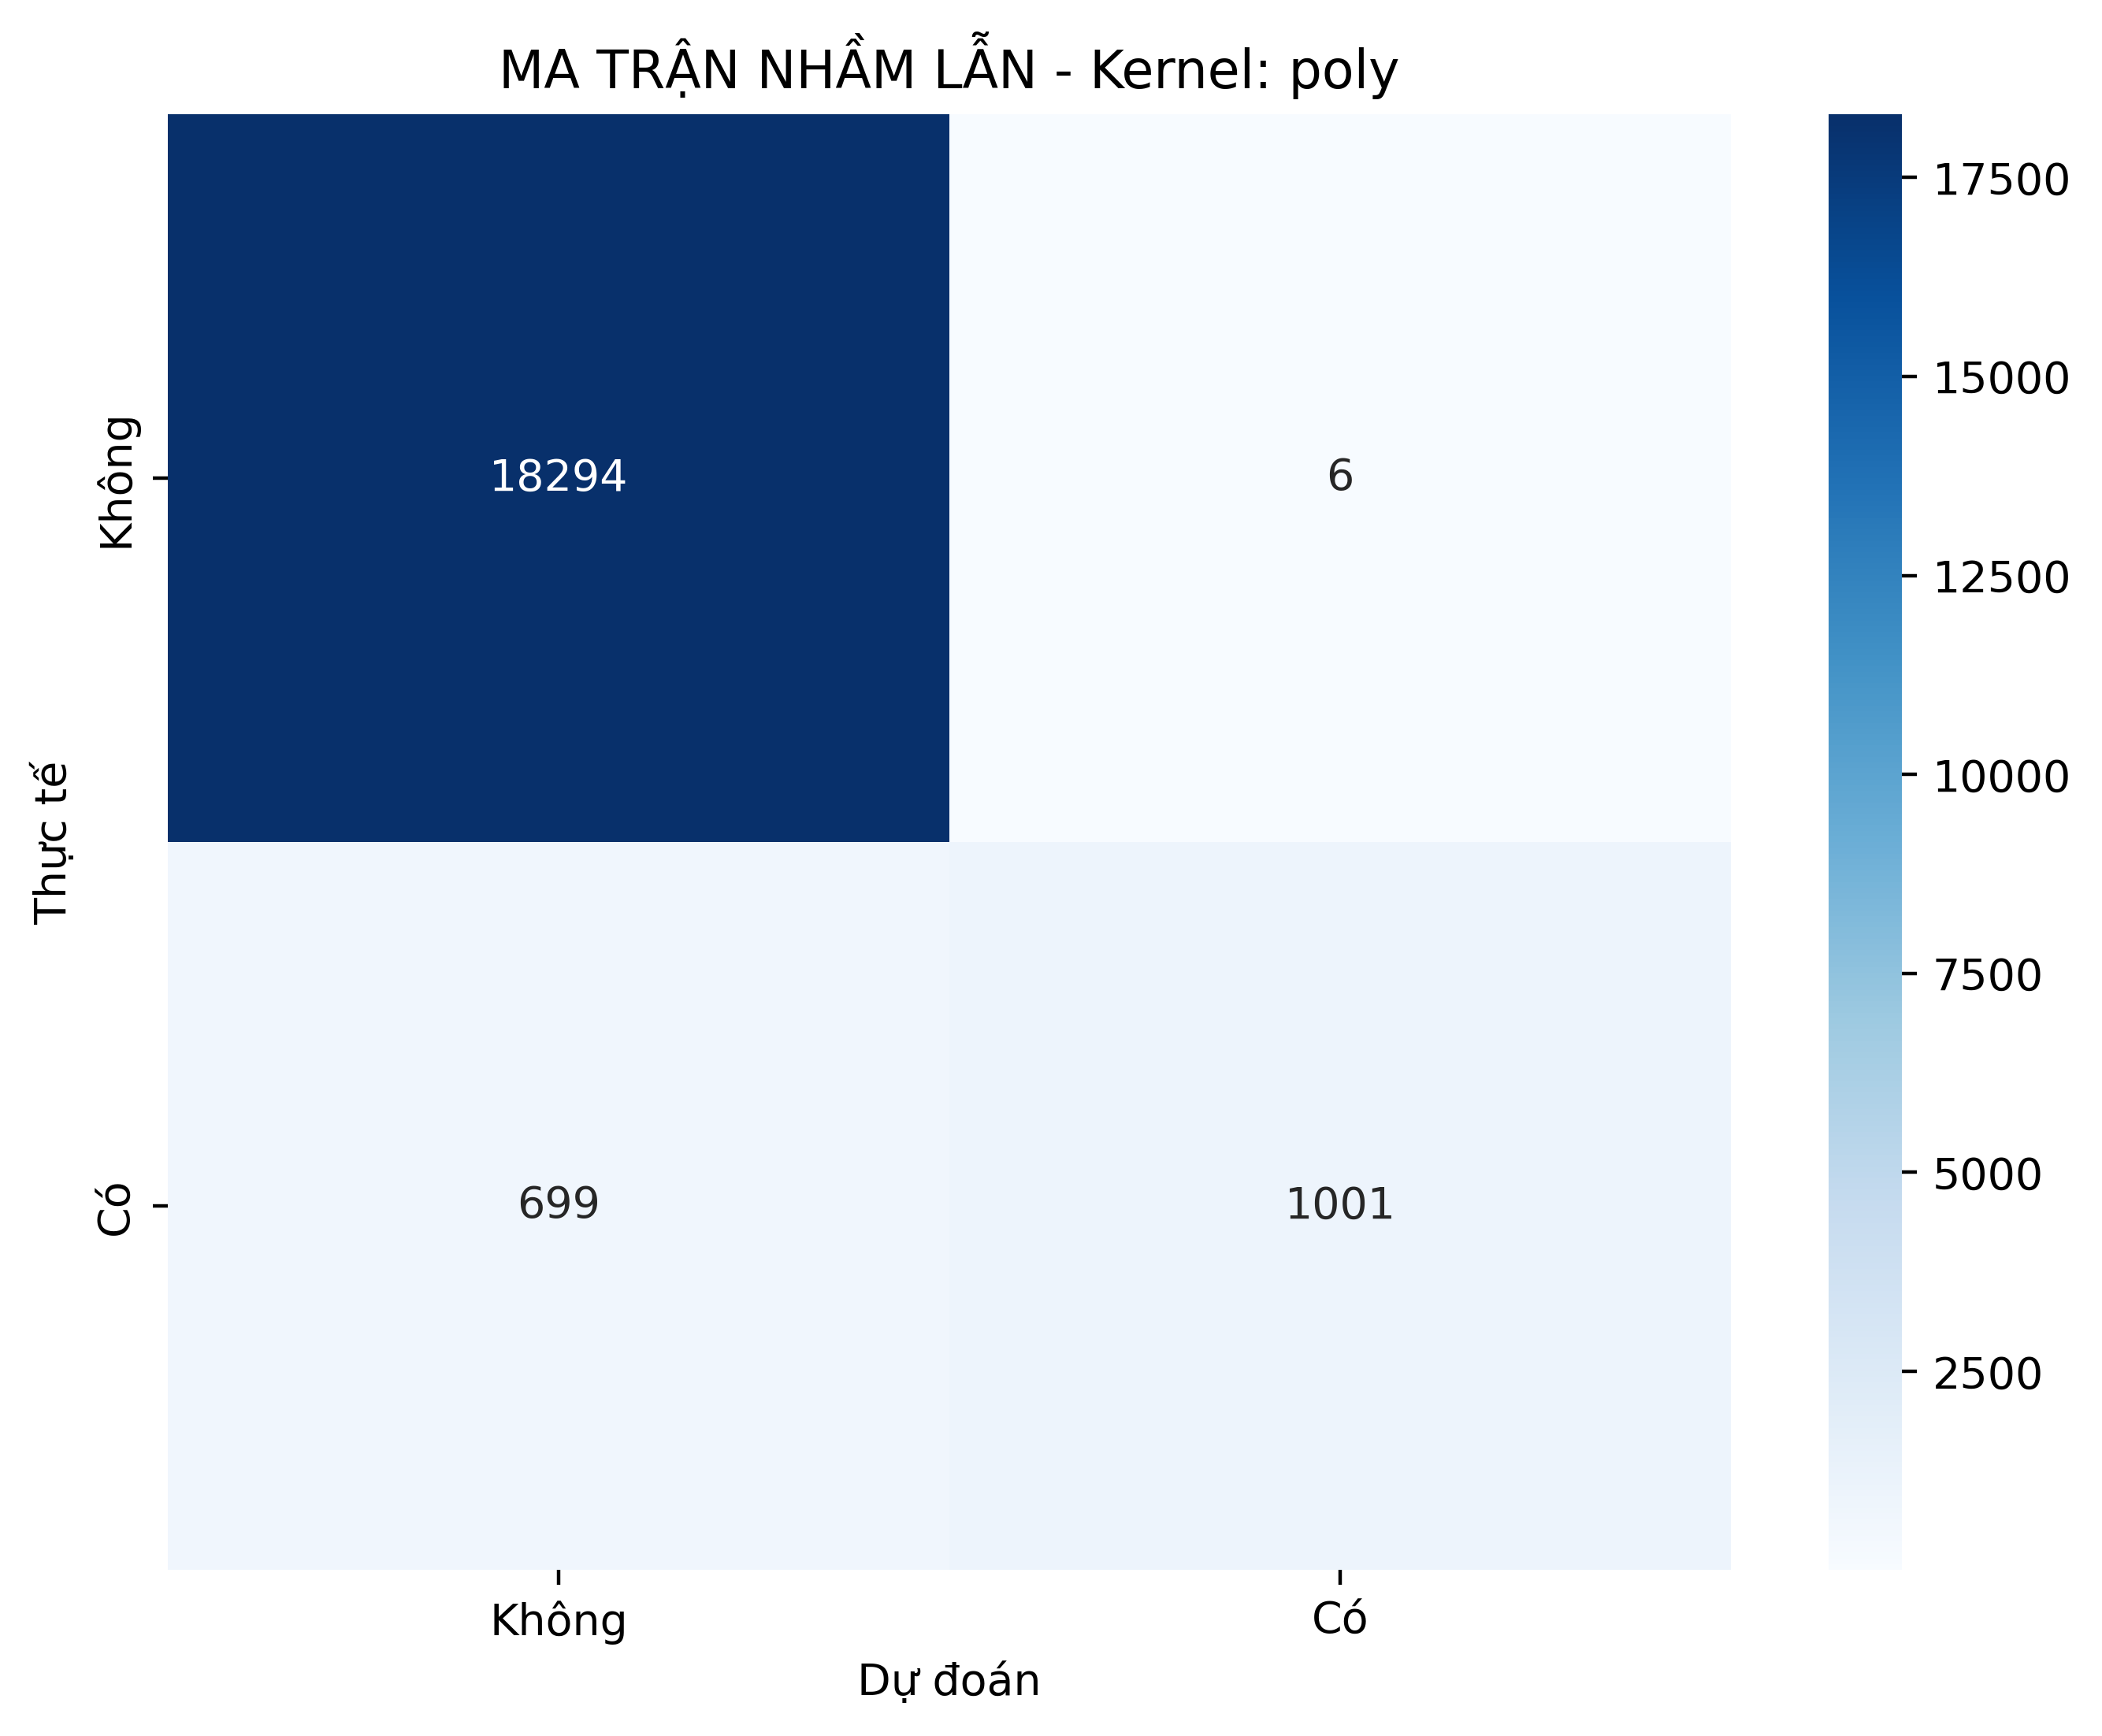


üìä B√ÅO C√ÅO PH√ÇN LO·∫†I:
                  precision    recall  f1-score   support

Kh√¥ng ti·ªÉu ƒë∆∞·ªùng       0.96      1.00      0.98     18300
      Ti·ªÉu ƒë∆∞·ªùng       0.99      0.59      0.74      1700

        accuracy                           0.96     20000
       macro avg       0.98      0.79      0.86     20000
    weighted avg       0.97      0.96      0.96     20000

üéØ K·∫æT QU·∫¢ CU·ªêI C√ôNG
Kernel t·ªët nh·∫•t: poly
ƒê·ªô ch√≠nh x√°c cu·ªëi c√πng: 0.9647
S·ªë features: 8
K√≠ch th∆∞·ªõc t·∫≠p test: 20000 m·∫´u


In [4]:
print("üéØ B√ÄI TO√ÅN SVM D·ª∞ ƒêO√ÅN B·ªÜNH TI·ªÇU ƒê∆Ø·ªúNG")
print("=" * 50)


df_processed = fec.copy()

# M√£ h√≥a categorical
label_encoders = {}
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

features = ['gender', 'age', 'hypertension', 'heart_disease',
           'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
target = 'diabetes'

X = df_processed[features]
y = df_processed[target]

# Chu·∫©n h√≥a
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Chia data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=101, stratify=y
)

print(f"‚úÖ Training: {X_train.shape}, Testing: {X_test.shape}")

# 2. SO S√ÅNH C√ÅC KERNEL (B√†i to√°n 1)
print("\n2. SO S√ÅNH C√ÅC KERNEL SVM...")

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

for kernel in kernels:
    model = svm.SVC(kernel=kernel, random_state=101)
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    results[kernel] = {'model': model, 'train_acc': train_acc, 'test_acc': test_acc}

    print(f"   {kernel:8} | Train: {train_acc:.4f} | Test: {test_acc:.4f}")

# T√¨m kernel t·ªët nh·∫•t
best_kernel = max(results, key=lambda x: results[x]['test_acc'])
best_model = results[best_kernel]['model']
print(f"‚≠ê KERNEL T·ªêT NH·∫§T: {best_kernel}")

# 3. PH√ÇN T√çCH D·ªÆ LI·ªÜU (B√†i to√°n 2)
print("\n3. PH√ÇN T√çCH D·ªÆ LI·ªÜU...")

# V·∫Ω distribution plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# HbA1c distribution by diabetes
sns.boxplot(x='diabetes', y='HbA1c_level', data=fec, ax=axes[0,0])
axes[0,0].set_title('HbA1c theo Ti·ªÉu ƒë∆∞·ªùng')

# Glucose distribution by diabetes
sns.boxplot(x='diabetes', y='blood_glucose_level', data=fec, ax=axes[0,1])
axes[0,1].set_title('Glucose m√°u theo Ti·ªÉu ƒë∆∞·ªùng')

# Age distribution by diabetes
sns.boxplot(x='diabetes', y='age', data=fec, ax=axes[1,0])
axes[1,0].set_title('Tu·ªïi theo Ti·ªÉu ƒë∆∞·ªùng')

# Correlation heatmap
numeric_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
corr_matrix = fec[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Ma tr·∫≠n T∆∞∆°ng quan')

plt.tight_layout()
plt.show()

# 4. ƒê√ÅNH GI√Å M√î H√åNH T·ªêT NH·∫§T
print("\n4. ƒê√ÅNH GI√Å M√î H√åNH T·ªêT NH·∫§T...")

# D·ª± ƒëo√°n v·ªõi model t·ªët nh·∫•t
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Kh√¥ng', 'C√≥'],
            yticklabels=['Kh√¥ng', 'C√≥'])
plt.title(f'MA TR·∫¨N NH·∫¶M L·∫™N - Kernel: {best_kernel}')
plt.ylabel('Th·ª±c t·∫ø')
plt.xlabel('D·ª± ƒëo√°n')
plt.show()

# Classification Report
print("\nüìä B√ÅO C√ÅO PH√ÇN LO·∫†I:")
print(classification_report(y_test, y_pred,
                          target_names=['Kh√¥ng ti·ªÉu ƒë∆∞·ªùng', 'Ti·ªÉu ƒë∆∞·ªùng']))

# 5. K·∫æT LU·∫¨N
final_accuracy = accuracy_score(y_test, y_pred)
print("=" * 50)
print("üéØ K·∫æT QU·∫¢ CU·ªêI C√ôNG")
print("=" * 50)
print(f"Kernel t·ªët nh·∫•t: {best_kernel}")
print(f"ƒê·ªô ch√≠nh x√°c cu·ªëi c√πng: {final_accuracy:.4f}")
print(f"S·ªë features: {len(features)}")
print(f"K√≠ch th∆∞·ªõc t·∫≠p test: {len(X_test)} m·∫´u")

**NH·∫¨N X√âT T·ªîNG QUAN:** M√¥ h√¨nh SVM ƒë√£ ƒë·∫°t ƒë∆∞·ª£c k·∫øt qu·∫£ ·∫•n t∆∞·ª£ng v·ªõi ƒë·ªô ch√≠nh x√°c t·ªïng th·ªÉ 96.47% trong vi·ªác d·ª± ƒëo√°n b·ªánh ti·ªÉu ƒë∆∞·ªùng, s·ª≠ d·ª•ng kernel polynomial cho hi·ªáu su·∫•t t·ªët nh·∫•t. ƒêi·ªÅu n√†y cho th·∫•y m·ªëi quan h·ªá gi·ªØa c√°c ƒë·∫∑c tr∆∞ng l√¢m s√†ng v√† b·ªánh ti·ªÉu ƒë∆∞·ªùng c√≥ t√≠nh ch·∫•t phi tuy·∫øn ph·ª©c t·∫°p, ph√π h·ª£p v·ªõi kernel poly h∆°n so v·ªõi c√°c kernel kh√°c. K·∫øt qu·∫£ n√†y kh·∫≥ng ƒë·ªãnh t√≠nh kh·∫£ thi c·ªßa vi·ªác ·ª©ng d·ª•ng machine learning trong h·ªó tr·ª£ ch·∫©n ƒëo√°n y t·∫ø, ƒë·∫∑c bi·ªát v·ªõi c√°c b·ªánh m√£n t√≠nh nh∆∞ ti·ªÉu ƒë∆∞·ªùng.

**SO S√ÅNH HI·ªÜU SU·∫§T GI·ªÆA C√ÅC KERNEL:** Trong s·ªë b·ªën kernel ƒë∆∞·ª£c ƒë√°nh gi√°, kernel polynomial th·ªÉ hi·ªán ∆∞u th·∫ø nh·∫π v·ªõi ƒë·ªô ch√≠nh x√°c 96.47% tr√™n t·∫≠p test, theo s√°t l√† kernel RBF (96.39%) v√† linear (96.07%). S·ª± ch√™nh l·ªách kh√¥ng ƒë√°ng k·ªÉ gi·ªØa c√°c kernel n√†y cho th·∫•y b√†i to√°n c√≥ th·ªÉ ti·∫øp c·∫≠n ƒë∆∞·ª£c b·∫±ng c·∫£ ph∆∞∆°ng ph√°p tuy·∫øn t√≠nh v√† phi tuy·∫øn. Kernel sigmoid cho k·∫øt qu·∫£ th·∫•p nh·∫•t (91.60%), ph√π h·ª£p v·ªõi l√Ω thuy·∫øt khi sigmoid th∆∞·ªùng k√©m hi·ªáu qu·∫£ v·ªõi c√°c b√†i to√°n ph√¢n lo·∫°i ph·ª©c t·∫°p. ƒê√°ng ch√∫ √Ω l√† hi·ªáu su·∫•t tr√™n t·∫≠p train v√† test t∆∞∆°ng ƒë·ªëi ƒë·ªìng ƒë·ªÅu across c√°c kernel, ch·ª©ng t·ªè m√¥ h√¨nh kh√¥ng b·ªã overfitting.

**PH√ÇN T√çCH V·∫§N ƒê·ªÄ M·∫§T C√ÇN B·∫∞NG L·ªöP:** M·∫∑c d√π ƒë·∫°t ƒë·ªô ch√≠nh x√°c t·ªïng th·ªÉ cao, k·∫øt qu·∫£ cho th·∫•y m·ªôt v·∫•n ƒë·ªÅ quan tr·ªçng v·ªÅ m·∫•t c√¢n b·∫±ng l·ªõp. Trong khi l·ªõp "Kh√¥ng ti·ªÉu ƒë∆∞·ªùng" ƒë·∫°t recall g·∫ßn nh∆∞ ho√†n h·∫£o (100%) v·ªõi f1-score 0.98, l·ªõp "Ti·ªÉu ƒë∆∞·ªùng" ch·ªâ ƒë·∫°t recall 59% v·ªõi f1-score 0.74. ƒêi·ªÅu n√†y c√≥ nghƒ©a m√¥ h√¨nh b·ªè s√≥t t·ªõi 41% tr∆∞·ªùng h·ª£p ti·ªÉu ƒë∆∞·ªùng th·ª±c t·∫ø - m·ªôt t·ª∑ l·ªá ƒë√°ng b√°o ƒë·ªông trong b·ªëi c·∫£nh y t·∫ø. Precision cao (99%) cho l·ªõp ti·ªÉu ƒë∆∞·ªùng cho th·∫•y khi m√¥ h√¨nh d·ª± ƒëo√°n c√≥ b·ªánh th√¨ r·∫•t ch√≠nh x√°c, nh∆∞ng kh·∫£ nƒÉng ph√°t hi·ªán b·ªánh nh√¢n th·ª±c s·ª± c√≤n h·∫°n ch·∫ø.

**ƒê√ÅNH GI√Å ·ª®NG D·ª§NG TH·ª∞C TI·ªÑN:** V·ªõi ƒë·ªô ch√≠nh x√°c 96.47%, m√¥ h√¨nh c√≥ ti·ªÅm nƒÉng ·ª©ng d·ª•ng trong s√†ng l·ªçc ban ƒë·∫ßu t·∫°i c√°c c∆° s·ªü y t·∫ø, gi√∫p gi·∫£m t·∫£i cho h·ªá th·ªëng ch·∫©n ƒëo√°n truy·ªÅn th·ªëng. Tuy nhi√™n, recall th·∫•p ·ªü l·ªõp thi·ªÉu s·ªë (ti·ªÉu ƒë∆∞·ªùng) l√† ƒëi·ªÉm y·∫øu nghi√™m tr·ªçng trong b·ªëi c·∫£nh y t·∫ø, n∆°i vi·ªác b·ªè s√≥t b·ªánh nh√¢n c√≥ th·ªÉ d·∫´n ƒë·∫øn h·∫≠u qu·∫£ n·∫∑ng n·ªÅ. M√¥ h√¨nh hi·ªán t·∫°i ph√π h·ª£p h∆°n cho vi·ªác x√°c nh·∫≠n c√°c tr∆∞·ªùng h·ª£p kh√¥ng m·∫Øc b·ªánh thay v√¨ ph√°t hi·ªán b·ªánh m·ªõi.

**KHUY·∫æN NGH·ªä C·∫¢I THI·ªÜN M√î H√åNH:** ƒê·ªÉ n√¢ng cao hi·ªáu su·∫•t th·ª±c t·∫ø, c·∫ßn t·∫≠p trung v√†o vi·ªác c·∫£i thi·ªán recall cho l·ªõp ti·ªÉu ƒë∆∞·ªùng th√¥ng qua c√°c k·ªπ thu·∫≠t x·ª≠ l√Ω m·∫•t c√¢n b·∫±ng l·ªõp nh∆∞ SMOTE, ƒëi·ªÅu ch·ªânh class weights, ho·∫∑c s·ª≠ d·ª•ng c√°c gi·∫£i thu·∫≠t √≠t nh·∫°y c·∫£m v·ªõi imbalance data. Vi·ªác ƒëi·ªÅu ch·ªânh ng∆∞·ª°ng ph√¢n lo·∫°i (threshold tuning) c≈©ng c√≥ th·ªÉ gi√∫p c√¢n b·∫±ng gi·ªØa precision v√† recall. Ngo√†i ra, c√≥ th·ªÉ th·ª≠ nghi·ªám v·ªõi c√°c ensemble methods k·∫øt h·ª£p nhi·ªÅu m√¥ h√¨nh ƒë·ªÉ c·∫£i thi·ªán kh·∫£ nƒÉng ph√°t hi·ªán c√°c tr∆∞·ªùng h·ª£p kh√≥.

**K·∫æT LU·∫¨N:** M√¥ h√¨nh SVM v·ªõi kernel poly ƒë√£ ch·ª©ng minh hi·ªáu qu·∫£ cao trong b√†i to√°n d·ª± ƒëo√°n ti·ªÉu ƒë∆∞·ªùng, tuy nhi√™n c·∫ßn gi·∫£i quy·∫øt tri·ªát ƒë·ªÉ v·∫•n ƒë·ªÅ m·∫•t c√¢n b·∫±ng l·ªõp ƒë·ªÉ c√≥ th·ªÉ ·ª©ng d·ª•ng th·ª±c t·∫ø trong ch·∫©n ƒëo√°n y t·∫ø. K·∫øt qu·∫£ n√†y m·ªü ra h∆∞·ªõng ph√°t tri·ªÉn c√°c h·ªá th·ªëng h·ªó tr·ª£ quy·∫øt ƒë·ªãnh l√¢m s√†ng d·ª±a tr√™n d·ªØ li·ªáu b·ªánh nh√¢n, g√≥p ph·∫ßn n√¢ng cao ch·∫•t l∆∞·ª£ng chƒÉm s√≥c s·ª©c kh·ªèe c·ªông ƒë·ªìng.

##2.3.4. X√¢y d·ª±ng m√¥ h√¨nh Na√Øve ng√¢y th∆° tr√™n t·∫≠p d·ªØ li·ªáu mushroom.

üçÑ PH√ÇN LO·∫†I N·∫§M S·ª¨ D·ª§NG NA√èVE BAYES
üìä Th√¥ng tin dataset:
K√≠ch th∆∞·ªõc: (8124, 23)
C√°c c·ªôt: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

5 d√≤ng ƒë·∫ßu ti√™n:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-

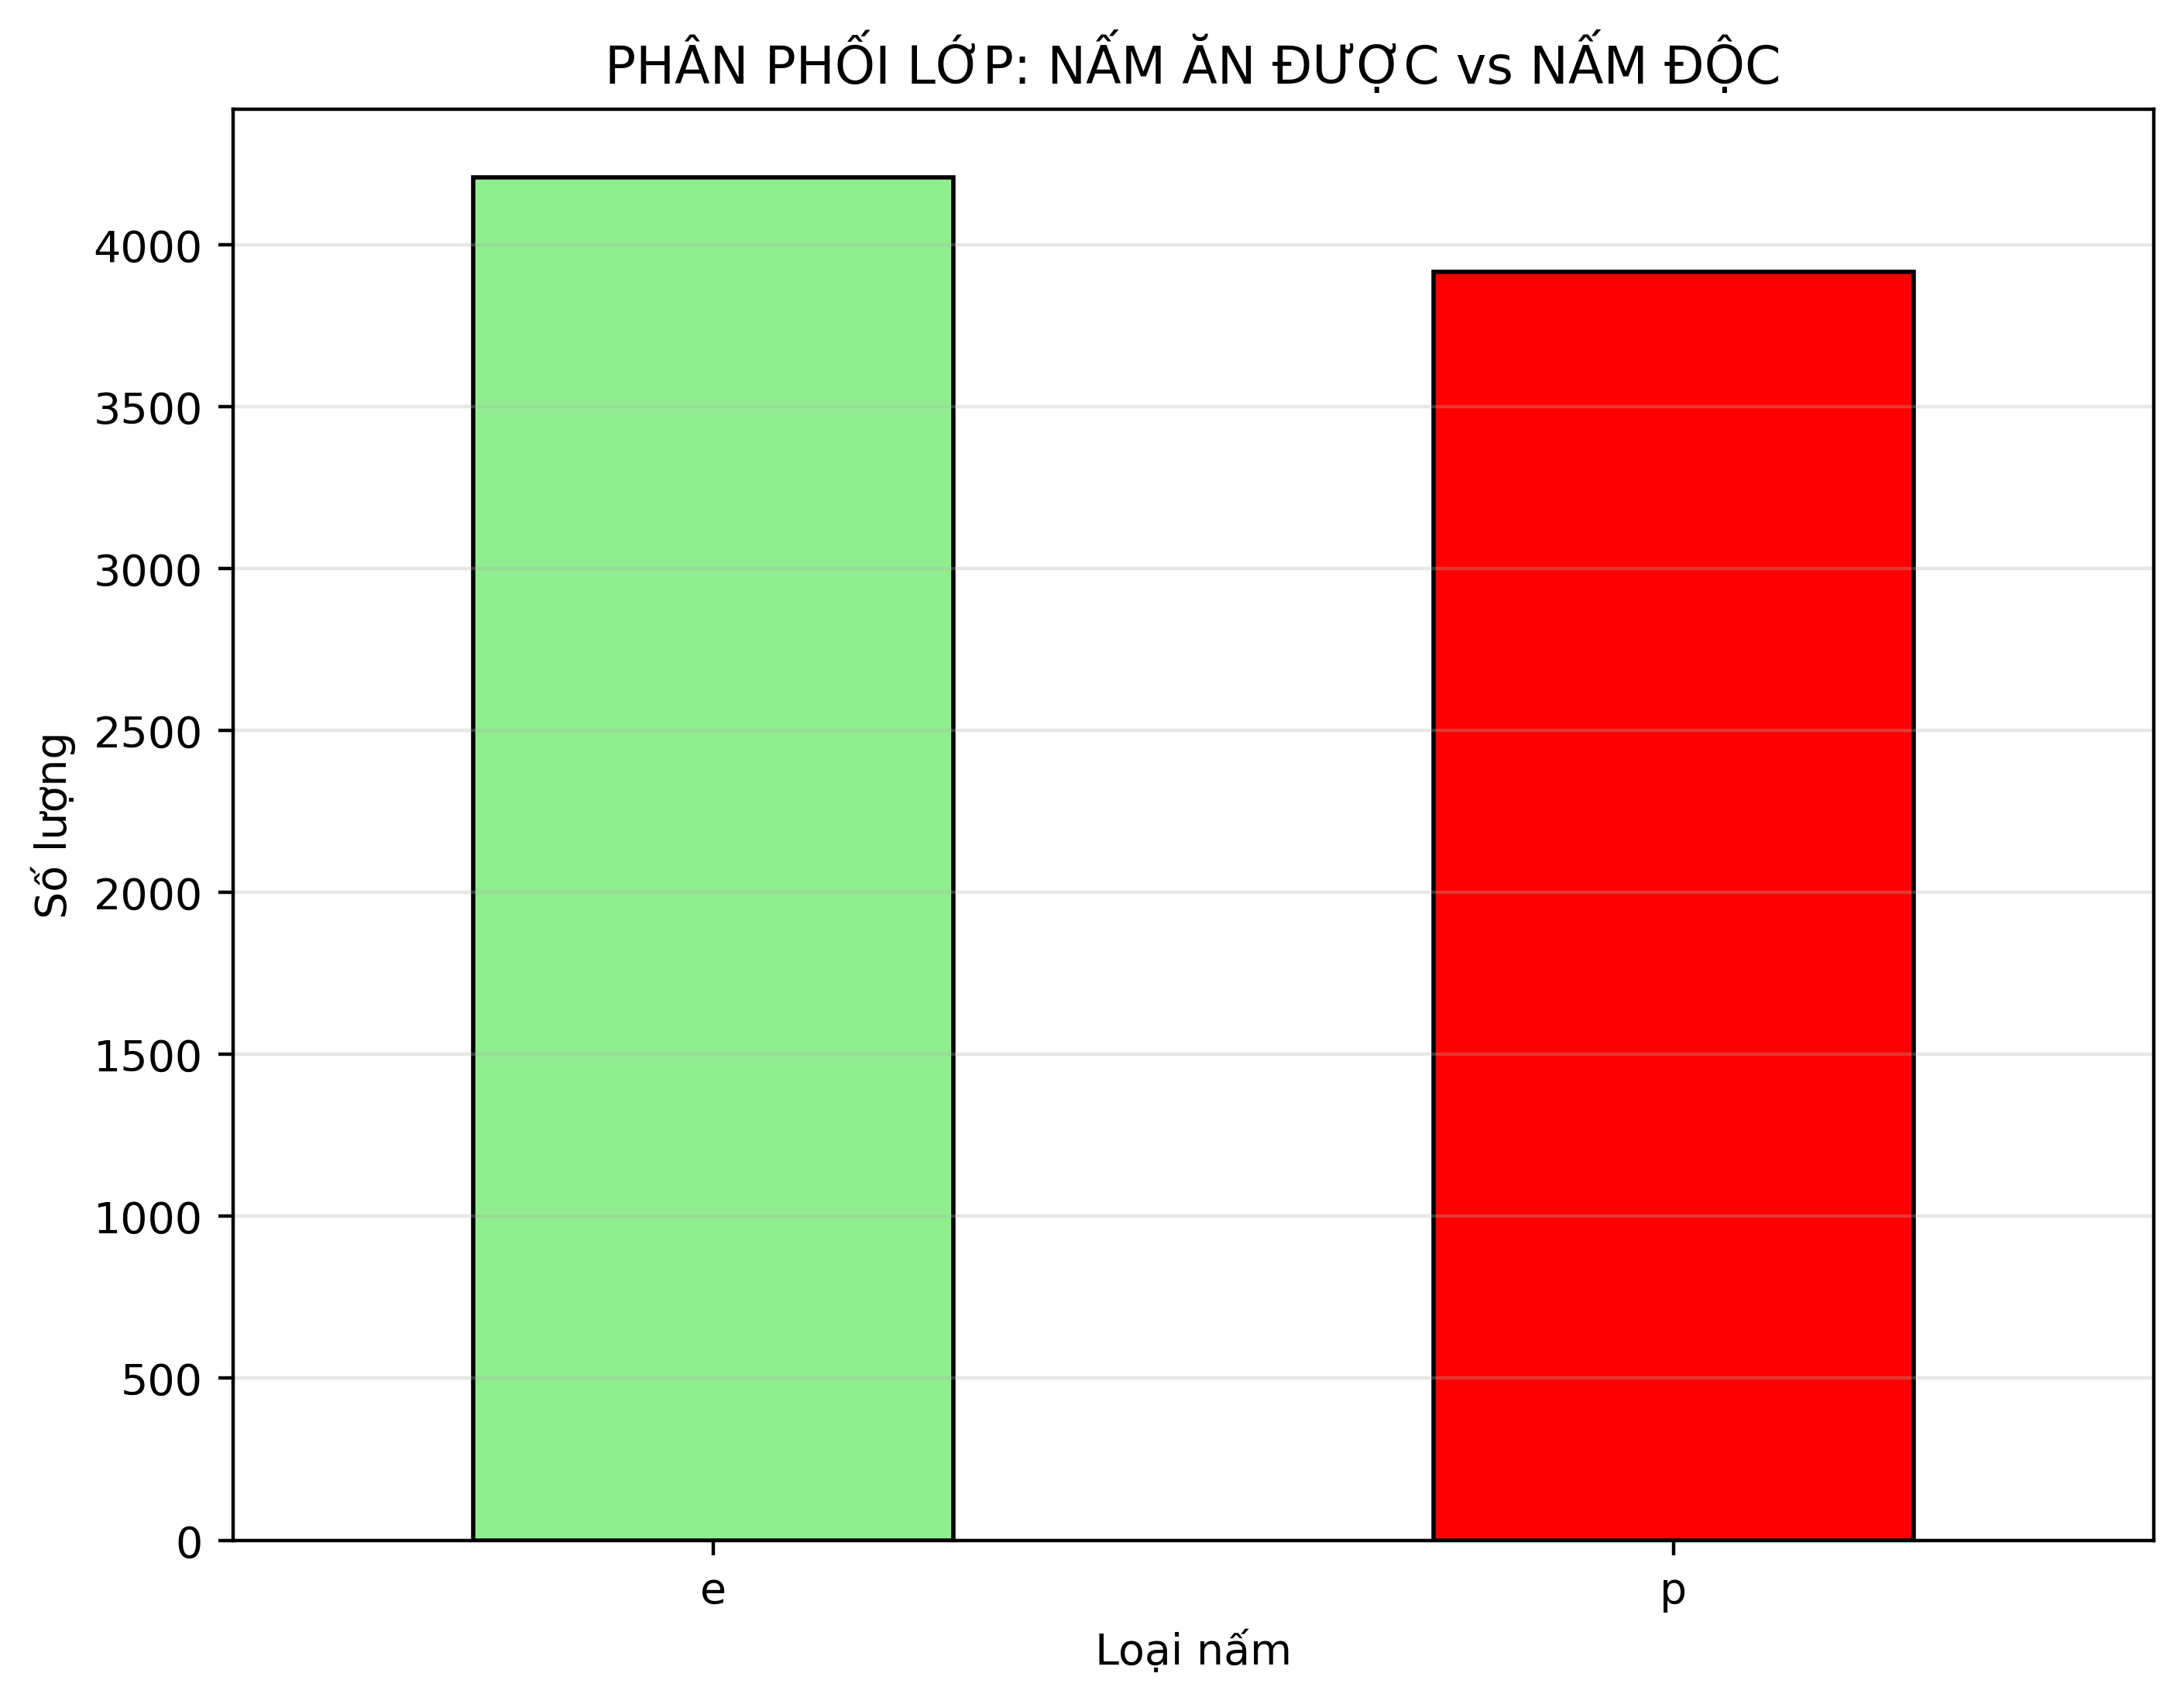


3. X·ª¨ L√ù D·ªÆ LI·ªÜU PH√ÇN LO·∫†I
‚úÖ ƒê√£ m√£ h√≥a class: 2 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a cap-shape: 6 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a cap-surface: 4 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a cap-color: 10 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a bruises: 2 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a odor: 9 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a gill-attachment: 2 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a gill-spacing: 2 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a gill-size: 2 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a gill-color: 12 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a stalk-shape: 2 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a stalk-root: 5 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a stalk-surface-above-ring: 4 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a stalk-surface-below-ring: 4 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a stalk-color-above-ring: 9 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a stalk-color-below-ring: 9 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a veil-type: 1 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a veil-color: 4 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a ring-number: 3 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a ring-type: 5 gi√° tr·ªã
‚úÖ ƒê√£ m√£ h√≥a spore-print-color: 9 gi√° tr·ªã
‚úÖ ƒê√

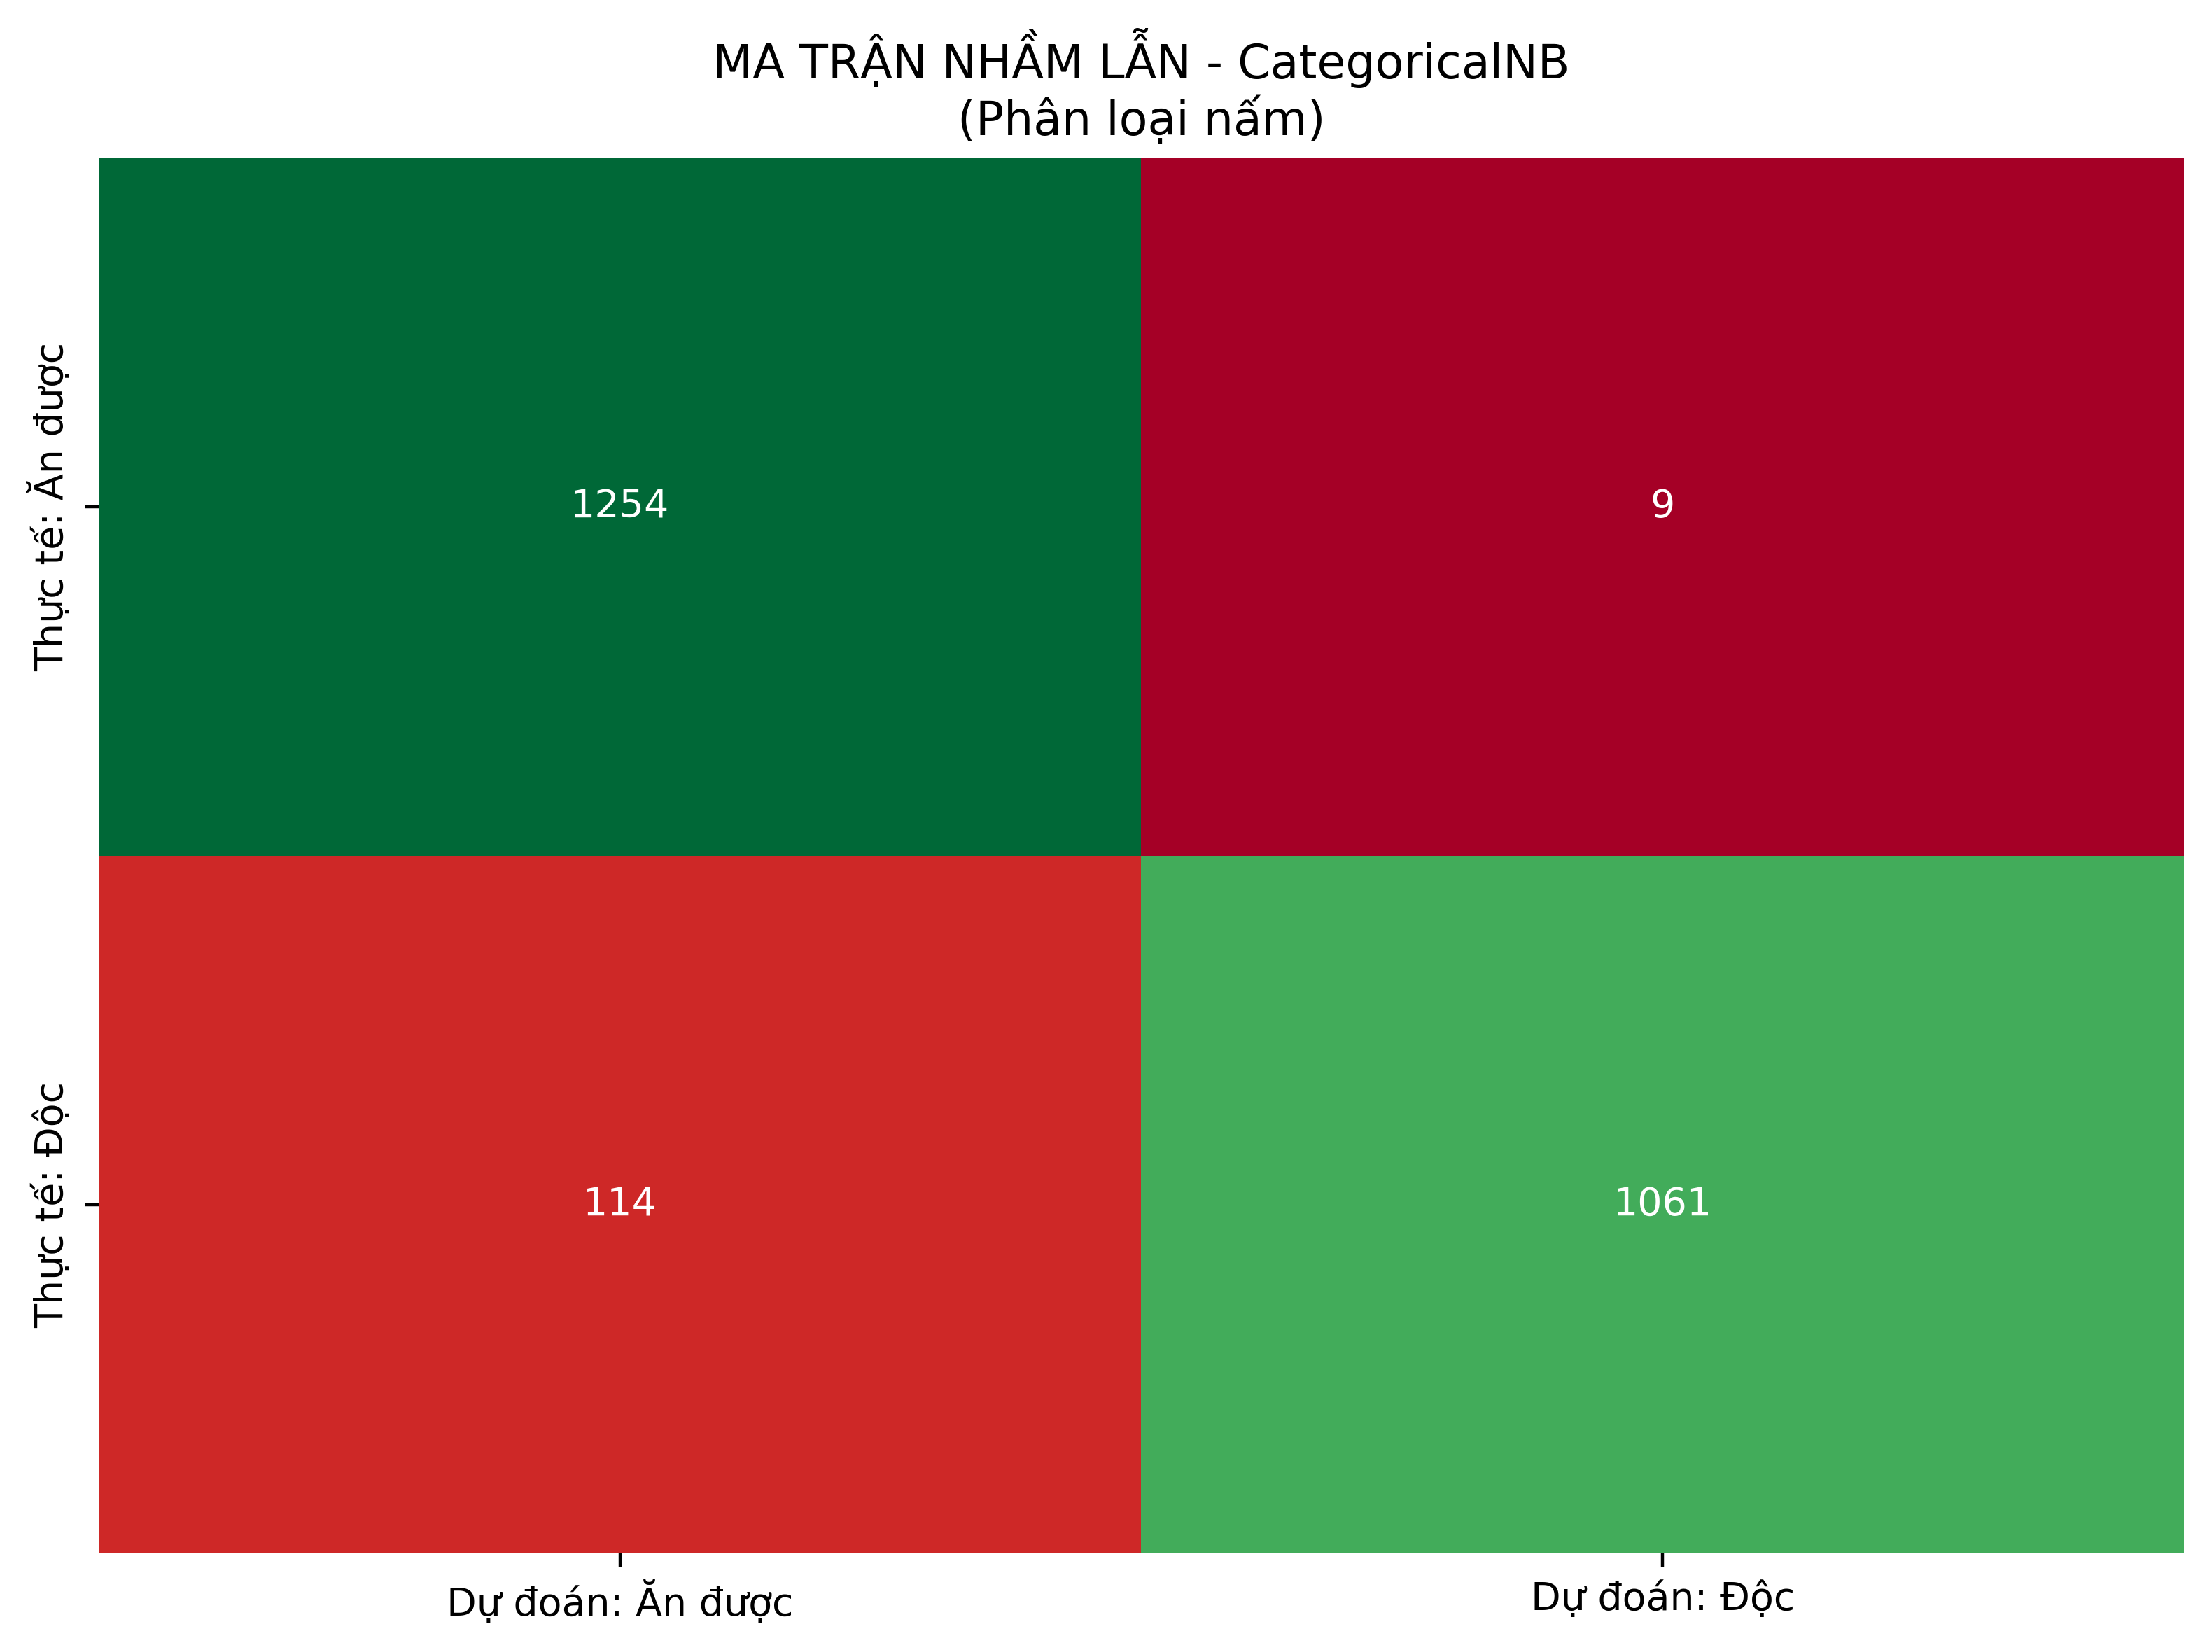

üìä B√ÅO C√ÅO PH√ÇN LO·∫†I CHI TI·∫æT:
                  precision    recall  f1-score   support

ƒÇn ƒë∆∞·ª£c (edible)       0.92      0.99      0.95      1263
 ƒê·ªôc (poisonous)       0.99      0.90      0.95      1175

        accuracy                           0.95      2438
       macro avg       0.95      0.95      0.95      2438
    weighted avg       0.95      0.95      0.95      2438


8. PH√ÇN T√çCH ƒê·∫∂C TR∆ØNG QUAN TR·ªåNG
Top 10 ƒë·∫∑c tr∆∞ng quan tr·ªçng nh·∫•t:
                     Feature  Importance
4                       odor    0.629530
19         spore-print-color    0.330191
8                 gill-color    0.283913
18                 ring-type    0.218053
11  stalk-surface-above-ring    0.203732
12  stalk-surface-below-ring    0.187273
13    stalk-color-above-ring    0.180185
14    stalk-color-below-ring    0.166082
7                  gill-size    0.155905
20                population    0.144846


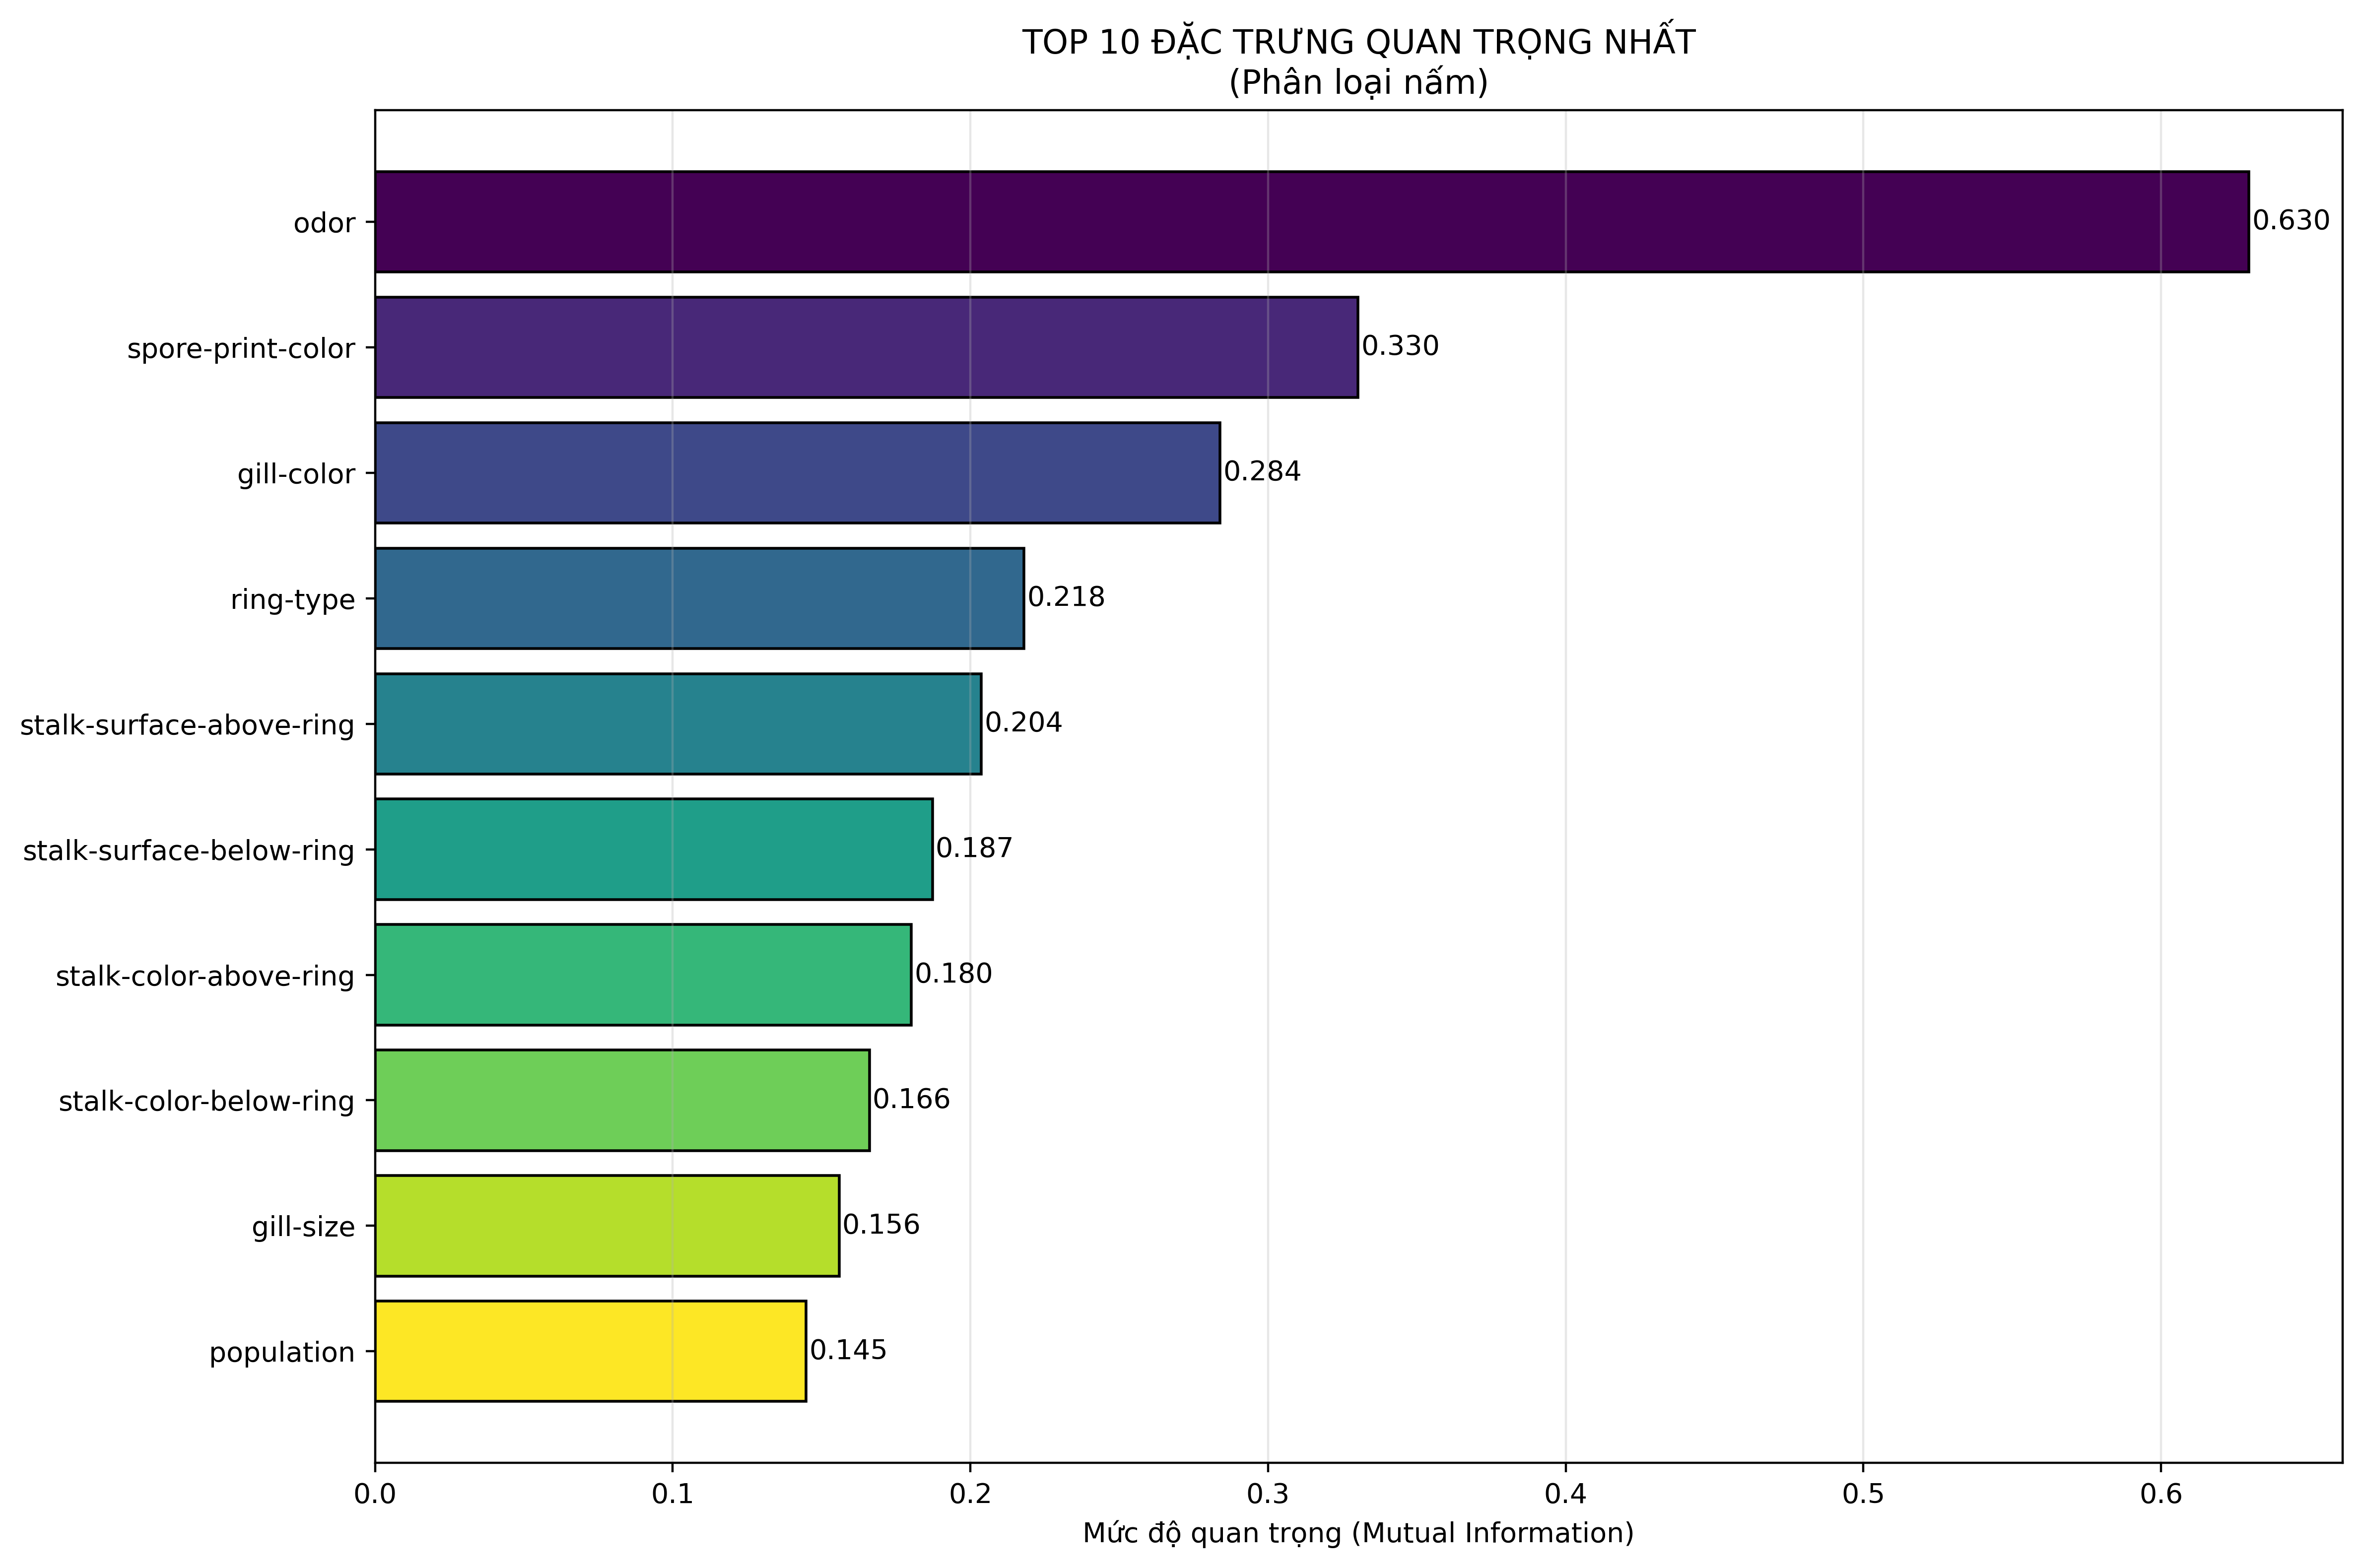


üí° GI·∫¢I TH√çCH:
‚Ä¢ Mutual Information ƒëo l∆∞·ªùng m·ª©c ƒë·ªô ph·ª• thu·ªôc gi·ªØa feature v√† target
‚Ä¢ Gi√° tr·ªã c√†ng cao ‚Üí Feature c√†ng quan tr·ªçng trong vi·ªác ph√¢n lo·∫°i
‚Ä¢ C√°c feature quan tr·ªçng th∆∞·ªùng: m√πi (odor), m√†u s·∫Øc, h√¨nh d·∫°ng...

9. D·ª∞ ƒêO√ÅN M·∫™U

üçÑ M·∫´u 1:
   - D·ª± ƒëo√°n: ƒÇN ƒê∆Ø·ª¢C ‚úÖ
   - Th·ª±c t·∫ø: ƒÇN ƒê∆Ø·ª¢C ‚úÖ
   - X√°c su·∫•t: ƒÇn ƒë∆∞·ª£c: 1.0000, ƒê·ªôc: 0.0000
   - K·∫øt qu·∫£: ƒê√öNG ‚úÖ

üçÑ M·∫´u 2:
   - D·ª± ƒëo√°n: ƒÇN ƒê∆Ø·ª¢C ‚úÖ
   - Th·ª±c t·∫ø: ƒÇN ƒê∆Ø·ª¢C ‚úÖ
   - X√°c su·∫•t: ƒÇn ƒë∆∞·ª£c: 1.0000, ƒê·ªôc: 0.0000
   - K·∫øt qu·∫£: ƒê√öNG ‚úÖ

üçÑ M·∫´u 3:
   - D·ª± ƒëo√°n: ƒÇN ƒê∆Ø·ª¢C ‚úÖ
   - Th·ª±c t·∫ø: ƒÇN ƒê∆Ø·ª¢C ‚úÖ
   - X√°c su·∫•t: ƒÇn ƒë∆∞·ª£c: 1.0000, ƒê·ªôc: 0.0000
   - K·∫øt qu·∫£: ƒê√öNG ‚úÖ

üéØ K·∫æT LU·∫¨N
‚Ä¢ M√¥ h√¨nh t·ªët nh·∫•t: CategoricalNB
‚Ä¢ ƒê·ªô ch√≠nh x√°c: 0.9495
‚Ä¢ S·ªë ƒë·∫∑c tr∆∞ng: 22
‚Ä¢ T·ªïng s·ªë m·∫´u: 8124
‚Ä¢ Ph√¢n ph·ªëi l·ªõp: {'e': 4208, 'p': 3916}
‚Ä¢ ·

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/v

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, chi2

print("üçÑ PH√ÇN LO·∫†I N·∫§M S·ª¨ D·ª§NG NA√èVE BAYES")
print("=" * 60)

# Hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n
print("üìä Th√¥ng tin dataset:")
print(f"K√≠ch th∆∞·ªõc: {mushroom_data.shape}")
print(f"C√°c c·ªôt: {mushroom_data.columns.tolist()}")
print("\n5 d√≤ng ƒë·∫ßu ti√™n:")
print(mushroom_data.head())
print("\n")

# Ki·ªÉm tra d·ªØ li·ªáu thi·∫øu
print("üîç Ki·ªÉm tra d·ªØ li·ªáu thi·∫øu:")
print(mushroom_data.isnull().sum())
print("\n")

# Ph√¢n ph·ªëi l·ªõp m·ª•c ti√™u (edible/poisonous)
print("üéØ Ph√¢n ph·ªëi l·ªõp:")
class_distribution = mushroom_data['class'].value_counts()
print(class_distribution)
print("\n")

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n ph·ªëi l·ªõp
plt.figure(figsize=(8, 6))
colors = ['lightgreen', 'red']
class_distribution.plot(kind='bar', color=colors, edgecolor='black')
plt.title('PH√ÇN PH·ªêI L·ªöP: N·∫§M ƒÇN ƒê∆Ø·ª¢C vs N·∫§M ƒê·ªòC')
plt.xlabel('Lo·∫°i n·∫•m')
plt.ylabel('S·ªë l∆∞·ª£ng')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. X·ª¨ L√ù D·ªÆ LI·ªÜU PH√ÇN LO·∫†I
print("\n3. X·ª¨ L√ù D·ªÆ LI·ªÜU PH√ÇN LO·∫†I")

# T·∫°o b·∫£n sao ƒë·ªÉ x·ª≠ l√Ω
data_processed = mushroom_data.copy()

# M√£ h√≥a t·∫•t c·∫£ c√°c c·ªôt categorical b·∫±ng LabelEncoder
label_encoders = {}
for column in data_processed.columns:
    le = LabelEncoder()
    data_processed[column] = le.fit_transform(data_processed[column])
    label_encoders[column] = le
    print(f"‚úÖ ƒê√£ m√£ h√≥a {column}: {len(le.classes_)} gi√° tr·ªã")

print("\nD·ªØ li·ªáu sau khi m√£ h√≥a:")
print(data_processed.head())
print("\n")

# 4. CHU·∫®N B·ª§ D·ªÆ LI·ªÜU CHO M√î H√åNH
print("\n4. CHU·∫®N B·ªä D·ªÆ LI·ªÜU")

# T√°ch features v√† target
X = data_processed.drop('class', axis=1)
y = data_processed['class']

# Gi·∫£i th√≠ch m√£ h√≥a
print("üìù Gi·∫£i th√≠ch m√£ h√≥a l·ªõp:")
print("class: 0 = edible (ƒÉn ƒë∆∞·ª£c), 1 = poisonous (ƒë·ªôc)")

# Chia t·∫≠p train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"üìä K√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán: {X_train.shape}")
print(f"üìä K√≠ch th∆∞·ªõc t·∫≠p ki·ªÉm tra: {X_test.shape}")
print(f"üìà Ph√¢n ph·ªëi l·ªõp trong t·∫≠p train: {pd.Series(y_train).value_counts().to_dict()}")

# 5. X√ÇY D·ª∞NG C√ÅC M√î H√åNH NA√èVE BAYES
print("\n5. X√ÇY D·ª∞NG M√î H√åNH NA√èVE BAYES")

models = {
    'CategoricalNB': CategoricalNB(),  # T·ªët nh·∫•t cho d·ªØ li·ªáu ph√¢n lo·∫°i
    'GaussianNB': GaussianNB(),        # Cho d·ªØ li·ªáu li√™n t·ª•c
    'MultinomialNB': MultinomialNB()   # Cho d·ªØ li·ªáu ƒë·∫øm ƒë∆∞·ª£c
}

results = {}

print("üîß ƒêang hu·∫•n luy·ªán c√°c m√¥ h√¨nh...")
for name, model in models.items():
    print(f"   - {name}...")
    model.fit(X_train, y_train)

    # D·ª± ƒëo√°n
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # ƒê√°nh gi√°
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# 6. SO S√ÅNH K·∫æT QU·∫¢
print("\n6. SO S√ÅNH HI·ªÜU SU·∫§T C√ÅC M√î H√åNH")

# T·∫°o b·∫£ng so s√°nh
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()]
}).sort_values('Accuracy', ascending=False)

print("üìã B·∫¢NG SO S√ÅNH ƒê·ªò CH√çNH X√ÅC:")
print(comparison_df)
print("\n")

# M√¥ h√¨nh t·ªët nh·∫•t
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"‚≠ê M√î H√åNH T·ªêT NH·∫§T: {best_model_name}")
print(f"‚≠ê ƒê·ªò CH√çNH X√ÅC: {best_accuracy:.4f}")

# 7. ƒê√ÅNH GI√Å CHI TI·∫æT M√î H√åNH T·ªêT NH·∫§T
print(f"\n7. ƒê√ÅNH GI√Å CHI TI·∫æT: {best_model_name}")

# Confusion Matrix
best_conf_matrix = results[best_model_name]['conf_matrix']
conf_matrix_df = pd.DataFrame(
    best_conf_matrix,
    index=['Th·ª±c t·∫ø: ƒÇn ƒë∆∞·ª£c', 'Th·ª±c t·∫ø: ƒê·ªôc'],
    columns=['D·ª± ƒëo√°n: ƒÇn ƒë∆∞·ª£c', 'D·ª± ƒëo√°n: ƒê·ªôc']
)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='RdYlGn', cbar=False)
plt.title(f'MA TR·∫¨N NH·∫¶M L·∫™N - {best_model_name}\n(Ph√¢n lo·∫°i n·∫•m)')
plt.tight_layout()
plt.show()

# Classification Report
best_predictions = results[best_model_name]['predictions']
print("üìä B√ÅO C√ÅO PH√ÇN LO·∫†I CHI TI·∫æT:")
print(classification_report(y_test, best_predictions,
                          target_names=['ƒÇn ƒë∆∞·ª£c (edible)', 'ƒê·ªôc (poisonous)']))

# 8. PH√ÇN T√çCH ƒê·∫∂C TR∆ØNG QUAN TR·ªåNG (ƒê∆†N GI·∫¢N)
print("\n8. PH√ÇN T√çCH ƒê·∫∂C TR∆ØNG QUAN TR·ªåNG")

from sklearn.feature_selection import mutual_info_classif

# T√≠nh importance s·ª≠ d·ª•ng mutual information
importance = mutual_info_classif(X, y, random_state=42)

# T·∫°o DataFrame importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

print("Top 10 ƒë·∫∑c tr∆∞ng quan tr·ªçng nh·∫•t:")
print(importance_df.head(10))

# V·∫Ω bi·ªÉu ƒë·ªì importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(10)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))

plt.barh(top_features['Feature'], top_features['Importance'], color=colors, edgecolor='black')
plt.xlabel('M·ª©c ƒë·ªô quan tr·ªçng (Mutual Information)')
plt.title('TOP 10 ƒê·∫∂C TR∆ØNG QUAN TR·ªåNG NH·∫§T\n(Ph√¢n lo·∫°i n·∫•m)')
plt.gca().invert_yaxis()

# Th√™m gi√° tr·ªã tr√™n m·ªói c·ªôt
for i, (importance, feature) in enumerate(zip(top_features['Importance'], top_features['Feature'])):
    plt.text(importance + 0.001, i, f'{importance:.3f}', va='center', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Gi·∫£i th√≠ch k·∫øt qu·∫£
print("\nüí° GI·∫¢I TH√çCH:")
print("‚Ä¢ Mutual Information ƒëo l∆∞·ªùng m·ª©c ƒë·ªô ph·ª• thu·ªôc gi·ªØa feature v√† target")
print("‚Ä¢ Gi√° tr·ªã c√†ng cao ‚Üí Feature c√†ng quan tr·ªçng trong vi·ªác ph√¢n lo·∫°i")
print("‚Ä¢ C√°c feature quan tr·ªçng th∆∞·ªùng: m√πi (odor), m√†u s·∫Øc, h√¨nh d·∫°ng...")
# 9. D·ª∞ ƒêO√ÅN M·∫™U
print("\n9. D·ª∞ ƒêO√ÅN M·∫™U")

# T·∫°o d·ªØ li·ªáu m·∫´u ƒë·ªÉ d·ª± ƒëo√°n
sample_indices = np.random.choice(len(X_test), 3, replace=False)

for i, idx in enumerate(sample_indices):
    sample_data = X_test.iloc[idx].values.reshape(1, -1)
    true_label = y_test.iloc[idx]

    prediction = best_model.predict(sample_data)[0]
    probability = best_model.predict_proba(sample_data)[0]

    print(f"\nüçÑ M·∫´u {i+1}:")
    print(f"   - D·ª± ƒëo√°n: {'ƒê·ªòC ‚ö†Ô∏è' if prediction == 1 else 'ƒÇN ƒê∆Ø·ª¢C ‚úÖ'}")
    print(f"   - Th·ª±c t·∫ø: {'ƒê·ªòC ‚ö†Ô∏è' if true_label == 1 else 'ƒÇN ƒê∆Ø·ª¢C ‚úÖ'}")
    print(f"   - X√°c su·∫•t: ƒÇn ƒë∆∞·ª£c: {probability[0]:.4f}, ƒê·ªôc: {probability[1]:.4f}")
    print(f"   - K·∫øt qu·∫£: {'ƒê√öNG ‚úÖ' if prediction == true_label else 'SAI ‚ùå'}")

# 10. K·∫æT LU·∫¨N
print("\n" + "=" * 60)
print("üéØ K·∫æT LU·∫¨N")
print("=" * 60)
print(f"‚Ä¢ M√¥ h√¨nh t·ªët nh·∫•t: {best_model_name}")
print(f"‚Ä¢ ƒê·ªô ch√≠nh x√°c: {best_accuracy:.4f}")
print(f"‚Ä¢ S·ªë ƒë·∫∑c tr∆∞ng: {X.shape[1]}")
print(f"‚Ä¢ T·ªïng s·ªë m·∫´u: {len(mushroom_data)}")
print(f"‚Ä¢ Ph√¢n ph·ªëi l·ªõp: {class_distribution.to_dict()}")
print("‚Ä¢ ·ª®ng d·ª•ng: Ph√¢n lo·∫°i n·∫•m gi√∫p tr√°nh ng·ªô ƒë·ªôc th·ª±c ph·∫©m")
print("=" * 60)

**NH·∫¨N X√âT T·ªîNG QUAN:** M√¥ h√¨nh Na√Øve Bayes ƒë√£ ƒë·∫°t ƒë∆∞·ª£c k·∫øt qu·∫£ xu·∫•t s·∫Øc trong vi·ªác ph√¢n lo·∫°i n·∫•m v·ªõi ƒë·ªô ch√≠nh x√°c t·ªïng th·ªÉ l√™n t·ªõi 94.95%. ƒêi·ªÅu n√†y cho th·∫•y gi·∫£i thu·∫≠t Na√Øve Bayes ƒë·∫∑c bi·ªát ph√π h·ª£p v·ªõi b√†i to√°n ph√¢n lo·∫°i n·∫•m khi t·∫•t c·∫£ c√°c ƒë·∫∑c tr∆∞ng ƒë·ªÅu mang t√≠nh ch·∫•t ph√¢n lo·∫°i. Trong s·ªë ba bi·∫øn th·ªÉ c·ªßa Na√Øve Bayes ƒë∆∞·ª£c th·ª≠ nghi·ªám, CategoricalNB th·ªÉ hi·ªán ∆∞u th·∫ø r√µ r·ªát v·ªõi hi·ªáu su·∫•t v∆∞·ª£t tr·ªôi so v·ªõi GaussianNB (91.59%) v√† MultinomialNB (81.46%), ƒëi·ªÅu n√†y ho√†n to√†n ph√π h·ª£p v√¨ CategoricalNB ƒë∆∞·ª£c thi·∫øt k·∫ø ƒë·∫∑c bi·ªát cho d·ªØ li·ªáu ph√¢n lo·∫°i.

**ƒê√ÅNH GI√Å HI·ªÜU SU·∫§T CHI TI·∫æT:** M√¥ h√¨nh CategoricalNB kh√¥ng ch·ªâ ƒë·∫°t ƒë·ªô ch√≠nh x√°c cao m√† c√≤n th·ªÉ hi·ªán s·ª± c√¢n b·∫±ng t·ªët gi·ªØa precision v√† recall tr√™n c·∫£ hai l·ªõp. ƒê·ªëi v·ªõi n·∫•m ƒÉn ƒë∆∞·ª£c, m√¥ h√¨nh ƒë·∫°t precision 92% v√† recall 99%, cho th·∫•y kh·∫£ nƒÉng x√°c ƒë·ªãnh ch√≠nh x√°c c√°c m·∫´u an to√†n. Trong khi ƒë√≥, v·ªõi n·∫•m ƒë·ªôc, precision ƒë·∫°t t·ªõi 99% v√† recall 90%, ch·ª©ng t·ªè m√¥ h√¨nh r·∫•t th·∫≠n tr·ªçng trong vi·ªác c·∫£nh b√°o nguy c∆° - m·ªôt y·∫øu t·ªë quan tr·ªçng trong ·ª©ng d·ª•ng th·ª±c t·∫ø v·ªÅ an to√†n th·ª±c ph·∫©m. S·ª± c√¢n b·∫±ng n√†y ƒë∆∞·ª£c ph·∫£n √°nh qua ƒëi·ªÉm F1-score 0.95 cho c·∫£ hai l·ªõp, cho th·∫•y m√¥ h√¨nh ·ªïn ƒë·ªãnh v√† ƒë√°ng tin c·∫≠y.

**PH√ÇN T√çCH ƒê·∫∂C TR∆ØNG QUAN TR·ªåNG:** K·∫øt qu·∫£ ph√¢n t√≠ch feature importance ti·∫øt l·ªô nh·ªØng ƒë·∫∑c ƒëi·ªÉm then ch·ªët trong vi·ªác ph√¢n bi·ªát n·∫•m ƒÉn ƒë∆∞·ª£c v√† n·∫•m ƒë·ªôc. ƒê·∫∑c tr∆∞ng "odor" (m√πi) n·ªïi b·∫≠t v·ªõi gi√° tr·ªã importance 0.63, kh·∫≥ng ƒë·ªãnh t·∫ßm quan tr·ªçng c·ªßa m√πi h∆∞∆°ng trong vi·ªác nh·∫≠n di·ªán n·∫•m ƒë·ªôc - ph√π h·ª£p v·ªõi ki·∫øn th·ª©c th·ª±c t·∫ø khi nhi·ªÅu lo·∫°i n·∫•m ƒë·ªôc ph√°t ra m√πi kh√≥ ch·ªãu. C√°c ƒë·∫∑c tr∆∞ng v·ªÅ m√†u s·∫Øc nh∆∞ "spore-print-color" (m√†u b√†o t·ª≠, 0.33) v√† "gill-color" (m√†u mang n·∫•m, 0.28) c≈©ng ƒë√≥ng vai tr√≤ quan tr·ªçng, ti·∫øp theo l√† c√°c ƒë·∫∑c ƒëi·ªÉm h√¨nh th√°i nh∆∞ "ring-type" (d·∫°ng v√≤ng, 0.22) v√† b·ªÅ m·∫∑t cu·ªëng n·∫•m. ƒêi·ªÅu n√†y cung c·∫•p insight c√≥ gi√° tr·ªã cho c·∫£ chuy√™n gia v√† ng∆∞·ªùi d√πng th√¥ng th∆∞·ªùng trong vi·ªác nh·∫≠n di·ªán n·∫•m an to√†n.

**·ª®NG D·ª§NG TH·ª∞C TI·ªÑN V√Ä H·∫†N CH·∫æ:** V·ªõi ƒë·ªô ch√≠nh x√°c 94.95% v√† kh·∫£ nƒÉng ph√¢n lo·∫°i ·ªïn ƒë·ªãnh, m√¥ h√¨nh n√†y c√≥ ti·ªÅm nƒÉng ·ª©ng d·ª•ng cao trong th·ª±c t·∫ø nh∆∞ m·ªôt c√¥ng c·ª• h·ªó tr·ª£ nh·∫≠n di·ªán n·∫•m an to√†n, ƒë·∫∑c bi·ªát h·ªØu √≠ch cho ng∆∞·ªùi ƒëi r·ª´ng, nh√† nghi√™n c·ª©u v√† ng∆∞·ªùi y√™u th√≠ch ·∫©m th·ª±c t·ª´ n·∫•m. Tuy nhi√™n, c·∫ßn l∆∞u √Ω r·∫±ng 5% sai s·ªë c√≤n l·∫°i c√≥ th·ªÉ d·∫´n ƒë·∫øn h·∫≠u qu·∫£ nghi√™m tr·ªçng trong tr∆∞·ªùng h·ª£p nh·∫ßm l·∫´n n·∫•m ƒë·ªôc th√†nh n·∫•m ƒÉn ƒë∆∞·ª£c. Do ƒë√≥, m√¥ h√¨nh n√™n ƒë∆∞·ª£c s·ª≠ d·ª•ng nh∆∞ m·ªôt c√¥ng c·ª• h·ªó tr·ª£ ch·ª© kh√¥ng thay th·∫ø ho√†n to√†n ki·∫øn th·ª©c chuy√™n m√¥n v√† c√°c ph∆∞∆°ng ph√°p ki·ªÉm tra truy·ªÅn th·ªëng.

**KHUY·∫æN NGH·ªä PH√ÅT TRI·ªÇN:** ƒê·ªÉ n√¢ng cao h∆°n n·ªØa ƒë·ªô tin c·∫≠y c·ªßa m√¥ h√¨nh, c√≥ th·ªÉ xem x√©t k·∫øt h·ª£p v·ªõi c√°c gi·∫£i thu·∫≠t kh√°c nh∆∞ Random Forest ho·∫∑c SVM ƒë·ªÉ t·∫°o th√†nh h·ªá th·ªëng ensemble, ƒë·ªìng th·ªùi b·ªï sung th√™m d·ªØ li·ªáu v·ªÅ c√°c lo·∫°i n·∫•m hi·∫øm v√† kh√≥ ph√¢n bi·ªát. Vi·ªác ph√°t tri·ªÉn ·ª©ng d·ª•ng di ƒë·ªông t√≠ch h·ª£p m√¥ h√¨nh n√†y c√πng v·ªõi h√¨nh ·∫£nh nh·∫≠n di·ªán s·∫Ω mang l·∫°i gi√° tr·ªã th·ª±c ti·ªÖn l·ªõn, gi√∫p gi·∫£m thi·ªÉu c√°c v·ª• ng·ªô ƒë·ªôc n·∫•m trong c·ªông ƒë·ªìng.